In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [46]:
def cat_analyser(dataframe, variable):
    print(variable)
    print(pd.DataFrame({"COUNT":dataframe[variable].value_counts(),
                        "RATE":dataframe[variable].value_counts(normalize=True)}))
    
def plot_dtypes(dataframe):
    print(dataframe.dtypes.value_counts())
    plt.figure(figsize=(12,10))
    plt.pie(dataframe.dtypes.value_counts().values,autopct="%1.2f%%",labels=[str(types) for types in dataframe.dtypes.value_counts().index])
    plt.title("Répartition des types dans le jeu de données.")
    plt.ylabel("Type des données")
    plt.legend()
    plt.show()
    
def analyse_num(dataframe,remove=["Col_ID"],hist_bins=20):
    num_cols = [col for col in dataframe.columns if not col in dataframe.select_dtypes(["object","category"]).columns.to_list()]
    if len(remove) > 0:
        num_cols = [col for col in num_cols if (col not in remove)]

    for col in num_cols:
        fig,axes = plt.subplots(1,2,figsize=(20,5))
        dataframe.hist(str(col),ax=axes[0],bins=hist_bins)
        dataframe.boxplot(str(col),ax=axes[1], vert=False)
        
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(col + " | Histogram")
        axes[1].set_title(col + " | Boxplot")
        plt.show()

def plot_freq_id(dataframe,variable,figsize=(9,7)):
    print(dataframe.groupby(variable)[variable].count().agg({"min", "max", "mean", "median", "std"}))
    plt.figure(figsize=figsize)
    sns.distplot(dataframe.groupby(variable)[variable].count())
    plt.show()
        
# Missing Value
def missing_values(data, plot=False):
    miss_val = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(), "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    miss_val["DataTypes"] = data[miss_val.index].dtypes.values
    miss_val = miss_val[miss_val.Num_Missing > 0].reset_index().rename({"index": "Feature"}, axis=1)

    print("Number of Variables include Missing Values:", miss_val.shape[0], "\n")

    if miss_val[miss_val.Missing_Ratio >= 1.0].shape[0] > 0:
        print("Full Missing Variables:", miss_val[miss_val.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[miss_val.Missing_Ratio >= 1.0].Feature.tolist(), axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(miss_val.Feature, miss_val.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(miss_val, "\n")

In [3]:
dir_data = "./data/"
train = pd.read_csv(dir_data + "application_train.csv")
bureau = pd.read_csv(dir_data + "bureau.csv")
bureau_balance = pd.read_csv(dir_data + "bureau_balance.csv")
pos = pd.read_csv(dir_data + "POS_CASH_balance.csv")
credit_card_balance = pd.read_csv(dir_data + "credit_card_balance.csv")
installments_pay = pd.read_csv(dir_data + "installments_payments.csv")
prev = pd.read_csv(dir_data + "previous_application.csv")

print("Dimension :")

print("application_train shape :",train.shape)
print("bureau shape :",bureau.shape)
print("bureau_balance shape :",bureau_balance.shape)
print("POS_CASH_balance shape :",pos.shape)
print("credit_card_balance shape :",credit_card_balance.shape)
print("installments_payments shape :",installments_pay.shape)
print("previous_application shape :",prev.shape)

Dimension :
application_train shape : (307511, 122)
bureau shape : (1716428, 17)
bureau_balance shape : (27299925, 3)
POS_CASH_balance shape : (10001358, 8)
credit_card_balance shape : (3840312, 23)
installments_payments shape : (13605401, 8)
previous_application shape : (1670214, 37)


In [4]:
cat_analyser(train,"TARGET")

TARGET
    COUNT  RATE
0  282686  0.92
1   24825  0.08


# Relation ID files

In [5]:
print("SK_ID_CURR dans le fichier train : ",train["SK_ID_CURR"].nunique())
print("-"*100)
print("SK_ID_CURR dans le fichier bureau : ",bureau["SK_ID_CURR"].nunique(), "et SK_ID_BUREAU :",bureau["SK_ID_BUREAU"].nunique())
print("SK_ID_CURR dans le fichier previous_app : ",prev["SK_ID_CURR"].nunique(), "et SK_ID_PREV :",prev["SK_ID_PREV"].nunique())
print("-"*100)

print("SK_ID_BUREAU dans le fichier bureau_balance : ",bureau_balance["SK_ID_BUREAU"].nunique())
print("Intersection bureau & bureau_balance :",
      bureau[bureau["SK_ID_BUREAU"].isin(bureau_balance["SK_ID_BUREAU"].unique())]["SK_ID_BUREAU"].nunique())
print("-"*50)
print("SK_ID_CURR dans le fichier pos : ",pos["SK_ID_CURR"].nunique(),"et SK_ID_PREV :",pos["SK_ID_PREV"].nunique(),
      "\nIntersection prev & pos :",prev[prev["SK_ID_PREV"].isin(pos["SK_ID_PREV"].unique())]["SK_ID_PREV"].nunique(),
      "\nIntersection train & pos :",train[train["SK_ID_CURR"].isin(pos["SK_ID_CURR"].unique())]["SK_ID_CURR"].nunique())
print("-"*50)
print("SK_ID_CURR dans le fichier credit_card_balance : ",credit_card_balance["SK_ID_CURR"].nunique(),"et SK_ID_PREV :",credit_card_balance["SK_ID_PREV"].nunique(),
      "\nIntersection prev & credit_card_balance :",prev[prev["SK_ID_PREV"].isin(credit_card_balance["SK_ID_PREV"].unique())]["SK_ID_PREV"].nunique(),
      "\nIntersection train & credit_card_balance :",train[train["SK_ID_CURR"].isin(credit_card_balance["SK_ID_CURR"].unique())]["SK_ID_CURR"].nunique())
print("-"*50)
print("SK_ID_CURR dans le fichier installments_pay : ",installments_pay["SK_ID_CURR"].nunique(),"et SK_ID_PREV :",installments_pay["SK_ID_PREV"].nunique(),
      "\nIntersection prev & installments_pay :",prev[prev["SK_ID_PREV"].isin(installments_pay["SK_ID_PREV"].unique())]["SK_ID_PREV"].nunique(),
      "\nIntersection train & installments_pay :",train[train["SK_ID_CURR"].isin(installments_pay["SK_ID_CURR"].unique())]["SK_ID_CURR"].nunique())

SK_ID_CURR dans le fichier train :  307511
----------------------------------------------------------------------------------------------------
SK_ID_CURR dans le fichier bureau :  305811 et SK_ID_BUREAU : 1716428
SK_ID_CURR dans le fichier previous_app :  338857 et SK_ID_PREV : 1670214
----------------------------------------------------------------------------------------------------
SK_ID_BUREAU dans le fichier bureau_balance :  817395
Intersection bureau & bureau_balance : 774354
--------------------------------------------------
SK_ID_CURR dans le fichier pos :  337252 et SK_ID_PREV : 936325 
Intersection prev & pos : 898903 
Intersection train & pos : 289444
--------------------------------------------------
SK_ID_CURR dans le fichier credit_card_balance :  103558 et SK_ID_PREV : 104307 
Intersection prev & credit_card_balance : 92935 
Intersection train & credit_card_balance : 86905
--------------------------------------------------
SK_ID_CURR dans le fichier installments_pay : 

# EDA shape

In [6]:
all_file = {"APPLICATION_TRAIN":train,
            "BUREAU":bureau,
            "BUREAU_BALANCE":bureau_balance,
            "POS_CASH_BALANCE":pos,
            "CREDIT_CARD_BALANCE":credit_card_balance,
            "INSTALLMENTS_PAYMENTS":installments_pay,
            "PREVIOUS_APPLICATION":prev}

In [7]:
for name_file,file in all_file.items():
    print(name_file)
    print(file.info(null_counts=True))
    print("-"*50)

APPLICATION_TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
--------------------------------------------------
BUREAU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   f

APPLICATION_TRAIN
float64    65
int64      41
object     16
dtype: int64


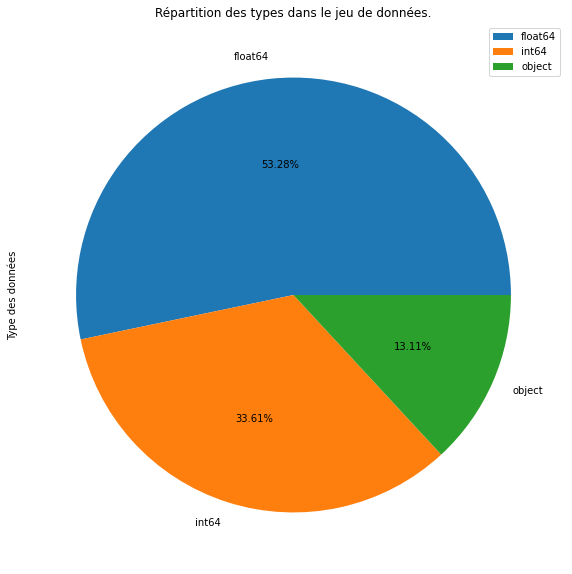

--------------------------------------------------
BUREAU
float64    8
int64      6
object     3
dtype: int64


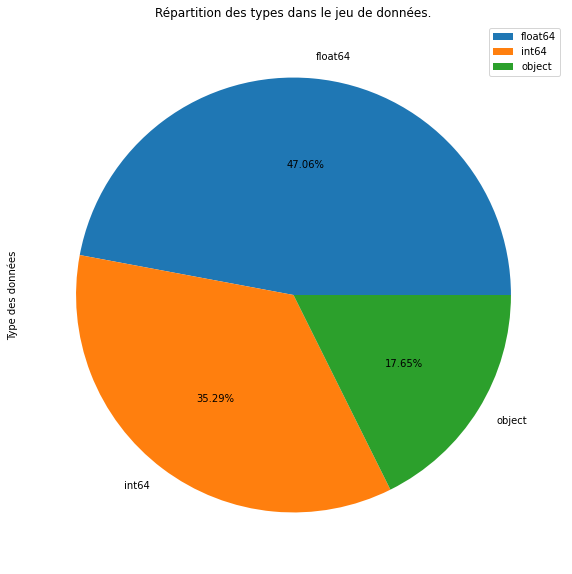

--------------------------------------------------
BUREAU_BALANCE
int64     2
object    1
dtype: int64


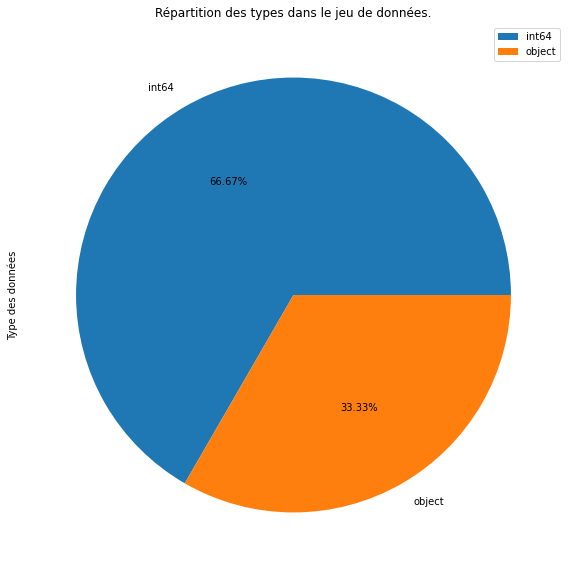

--------------------------------------------------
POS_CASH_BALANCE
int64      5
float64    2
object     1
dtype: int64


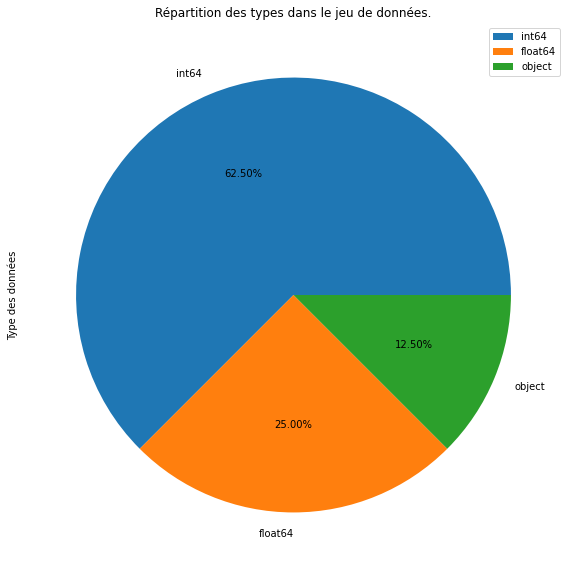

--------------------------------------------------
CREDIT_CARD_BALANCE
float64    15
int64       7
object      1
dtype: int64


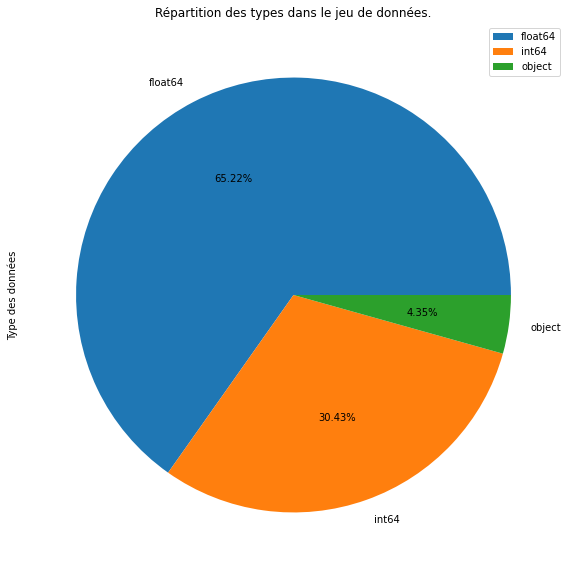

--------------------------------------------------
INSTALLMENTS_PAYMENTS
float64    5
int64      3
dtype: int64


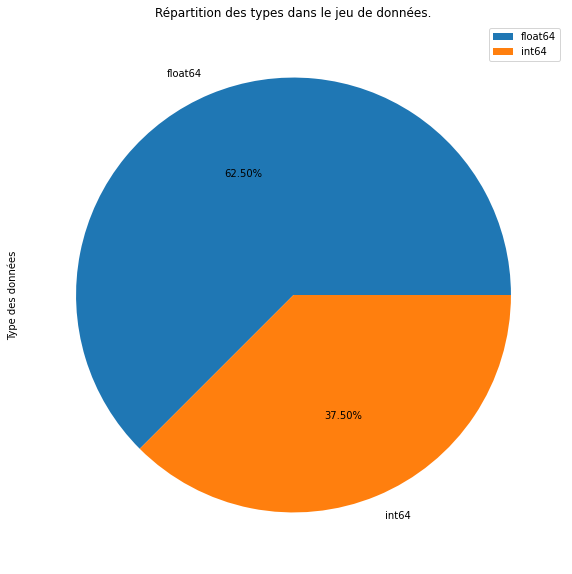

--------------------------------------------------
PREVIOUS_APPLICATION
object     16
float64    15
int64       6
dtype: int64


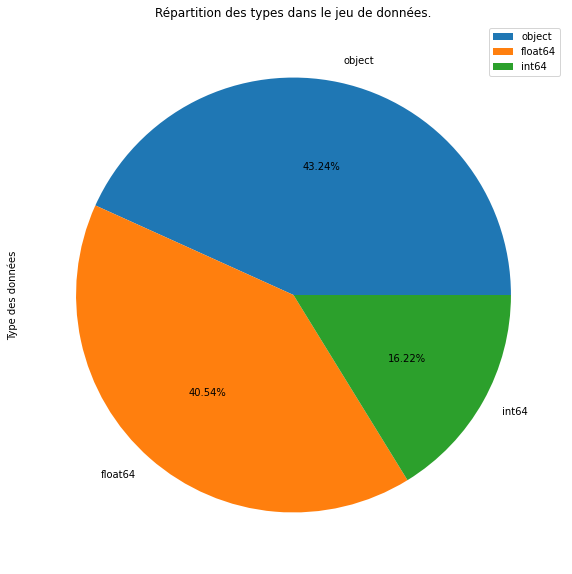

--------------------------------------------------


In [8]:
for name_file,file in all_file.items():
    print(name_file)
    plot_dtypes(file)
    print("-"*50)

# Bureau_balance EDA

In [9]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [33]:
missing_values(bureau_balance)

Number of Variables include Missing Values: 0 

Empty DataFrame
Columns: [Feature, Num_Missing, Missing_Ratio, DataTypes]
Index: [] 



mean     33.40
std      25.79
min       1.00
max      97.00
median   26.00
Name: SK_ID_BUREAU, dtype: float64


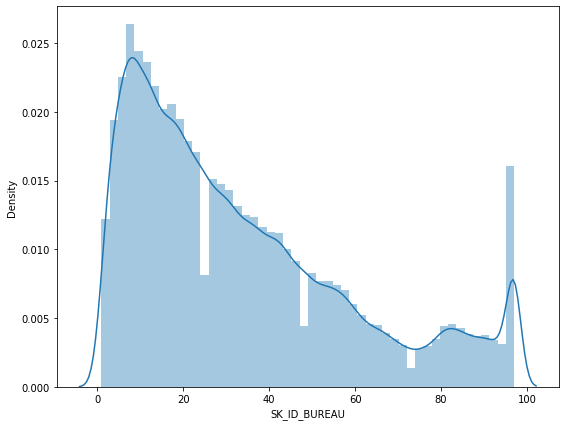

In [47]:
plot_freq_id(bureau_balance,"SK_ID_BUREAU")

In [11]:
bureau_balance.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,"27,299,925.00",NaN,NaN,NaN,"6,036,297.33","492,348.86","5,001,709.00","5,730,933.00","6,070,821.00","6,431,951.00","6,842,888.00"
MONTHS_BALANCE,"27,299,925.00",NaN,NaN,NaN,-30.74,23.86,-96.00,-46.00,-25.00,-11.00,0.00
STATUS,27299925,8,C,13646993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
bureau_balance["STATUS"].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

- C = Fermé
- X = Inconnu
- 0 = pas de DPD (Day Past Due)
- 1 = fait maximal au cours du mois entre 1-30
- 2 = DPD 31-60
- 3 = DPD 60 - 90 ?
- 4 = DPD 90 -120 ?
- 5 = DPD 120+ ou vendu ou radié 

In [13]:
bureau_balance.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [14]:
bureau_balance.select_dtypes(["category", "object"]).columns.tolist()

['STATUS']

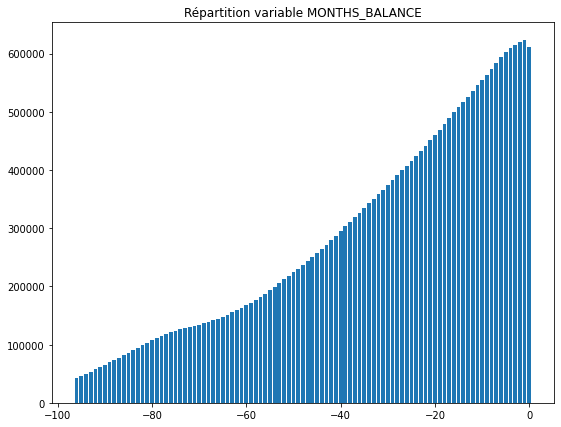

In [15]:
plt.figure(figsize=(9,7))
plt.bar(bureau_balance["MONTHS_BALANCE"].value_counts().index,bureau_balance["MONTHS_BALANCE"].value_counts().values)
plt.title("Répartition variable MONTHS_BALANCE")
plt.show()

# Bureau EDA

bureau est relié par application_train grâce a SK_ID_CURR et bureau_balance avec bureau par SK_ID_BUREAU

In [16]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,NaN,0,"91,323.00",0.00,NaN,0.00,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,"1,075.00",NaN,NaN,0,"225,000.00","171,342.00",NaN,0.00,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.00,NaN,NaN,0,"464,323.50",NaN,NaN,0.00,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,"90,000.00",NaN,NaN,0.00,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,"1,197.00",NaN,"77,674.50",0,"2,700,000.00",NaN,NaN,0.00,Consumer credit,-21,NaN


mean       5.61
std        4.43
min        1.00
max      116.00
median     4.00
Name: SK_ID_CURR, dtype: float64


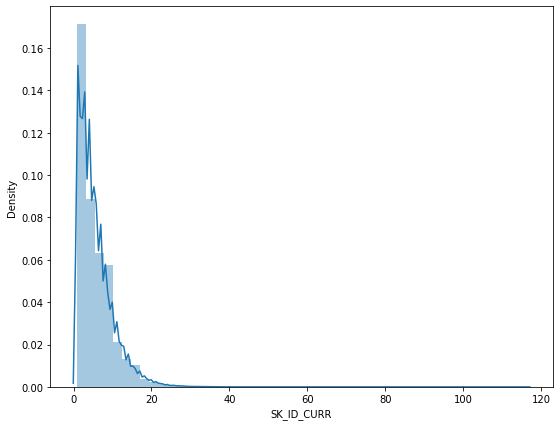

In [49]:
plot_freq_id(bureau,"SK_ID_CURR")

In [18]:
des_b = bureau.select_dtypes("object").describe().T
des_b["nunique"] = bureau.select_dtypes("object").nunique()
des_b["unique"] = bureau.select_dtypes("object").apply(pd.Series.unique,axis=0)
des_b

,count,unique,top,freq,nunique
CREDIT_ACTIVE,1716428,"[Closed, Active, Sold, Bad debt]",Closed,1079273,4
CREDIT_CURRENCY,1716428,"[currency 1, currency 2, currency 4, currency 3]",currency 1,1715020,4
CREDIT_TYPE,1716428,"[Consumer credit, Credit card, Mortgage, Car l...",Consumer credit,1251615,15


In [19]:
des_b.loc["CREDIT_TYPE","unique"]

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

Number of Variables include Missing Values: 7 



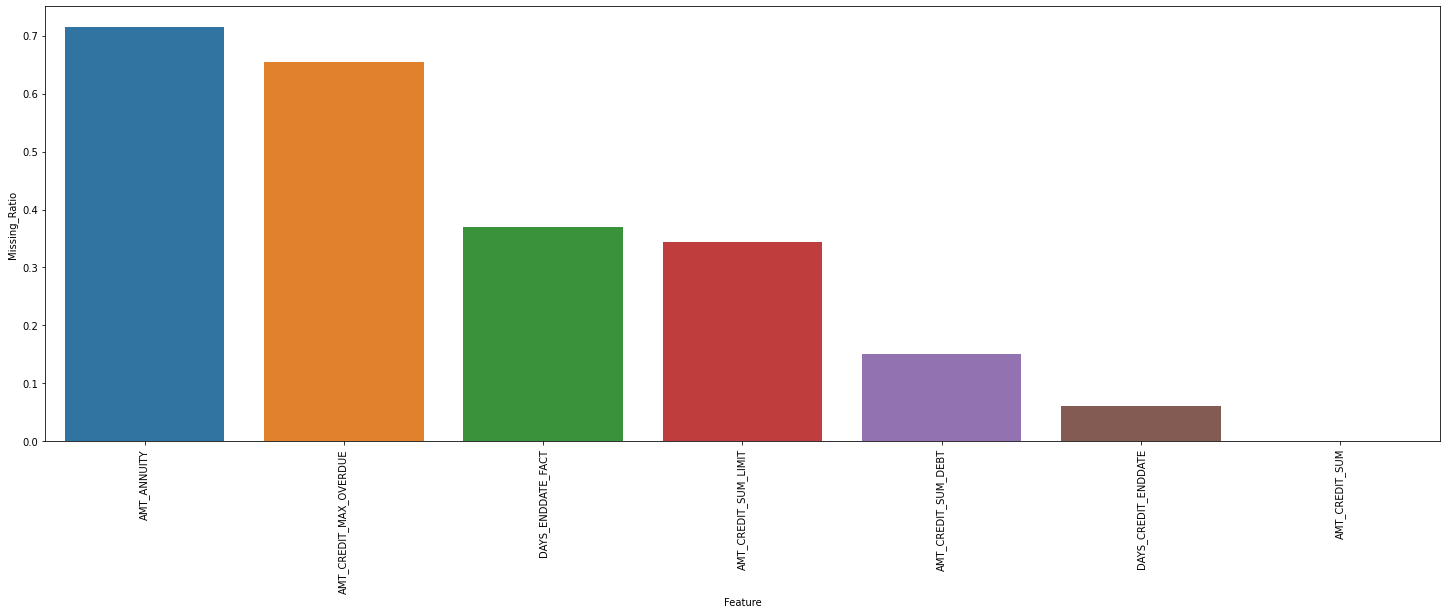

                  Feature  Num_Missing  Missing_Ratio DataTypes
0             AMT_ANNUITY      1226791           0.71   float64
1  AMT_CREDIT_MAX_OVERDUE      1124488           0.66   float64
2       DAYS_ENDDATE_FACT       633653           0.37   float64
3    AMT_CREDIT_SUM_LIMIT       591780           0.34   float64
4     AMT_CREDIT_SUM_DEBT       257669           0.15   float64
5     DAYS_CREDIT_ENDDATE       105553           0.06   float64
6          AMT_CREDIT_SUM           13           0.00   float64 



In [21]:
missing_values(bureau,plot=True)

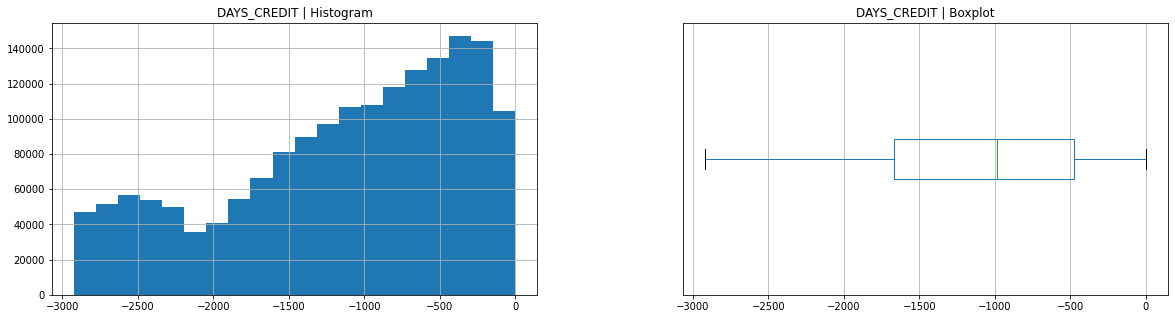

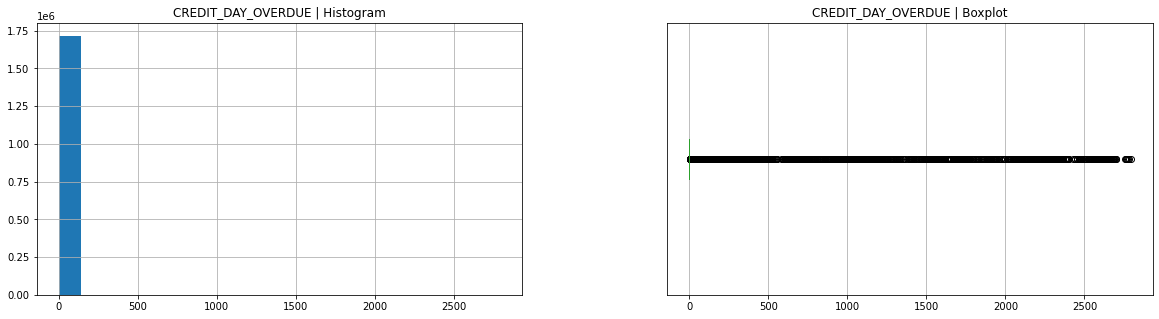

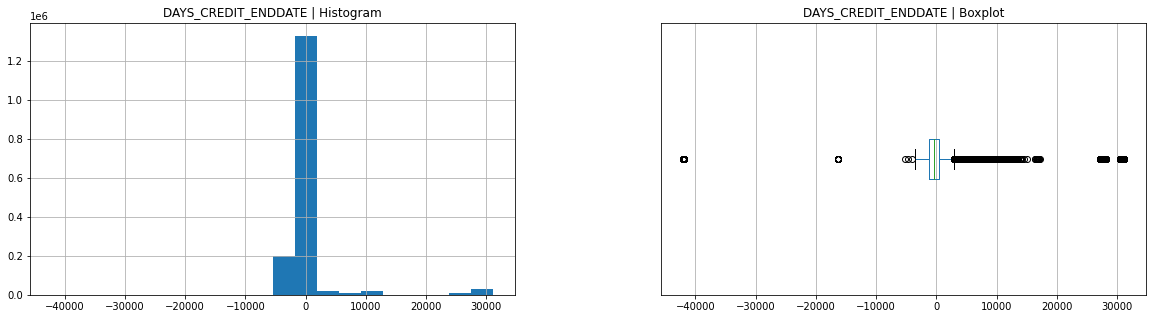

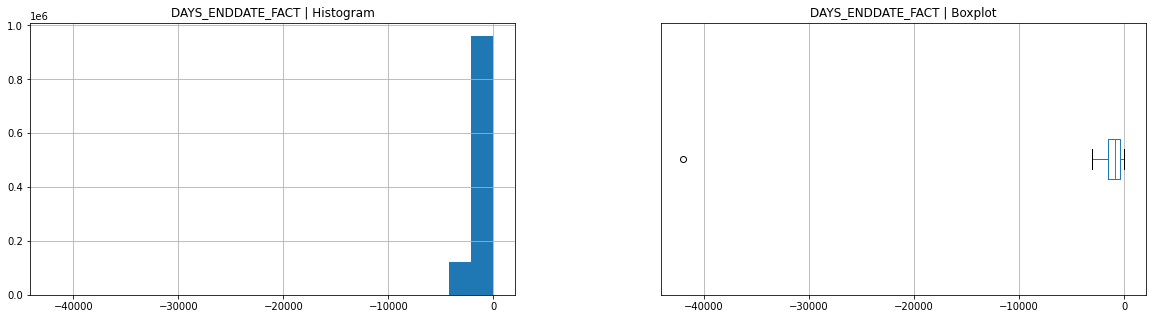

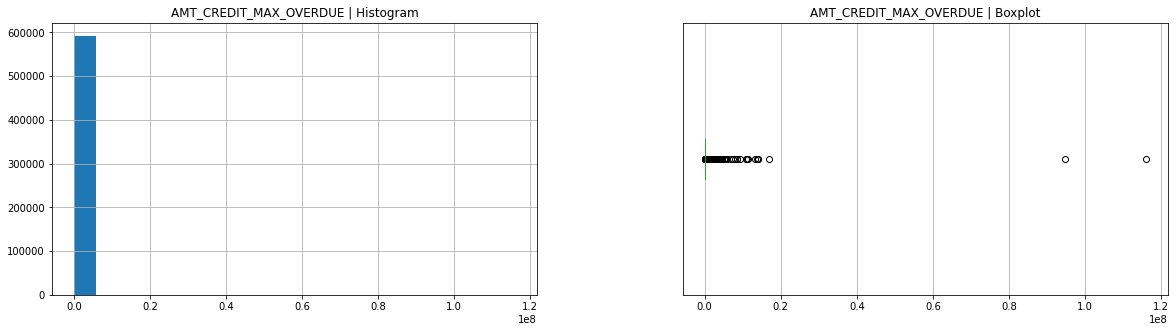

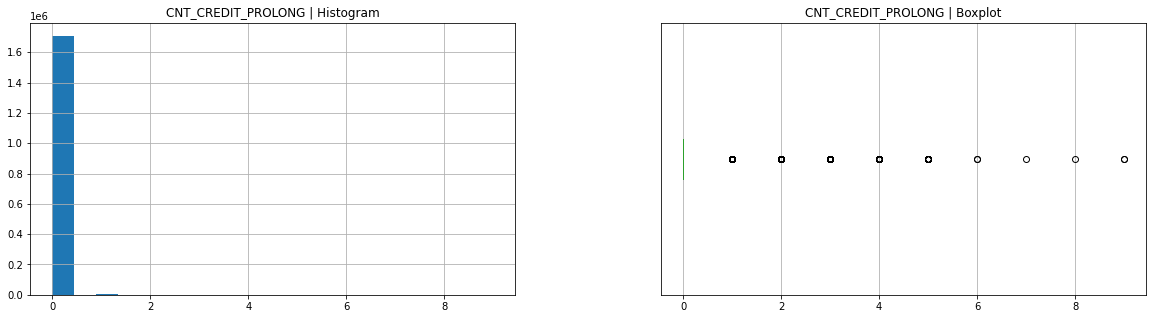

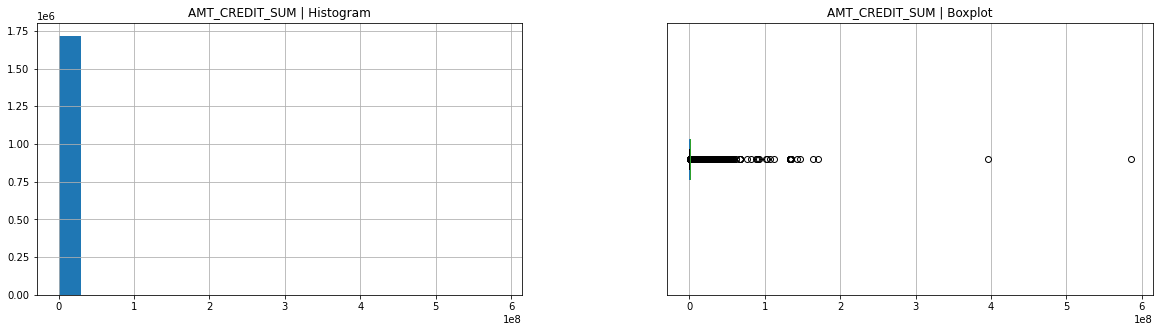

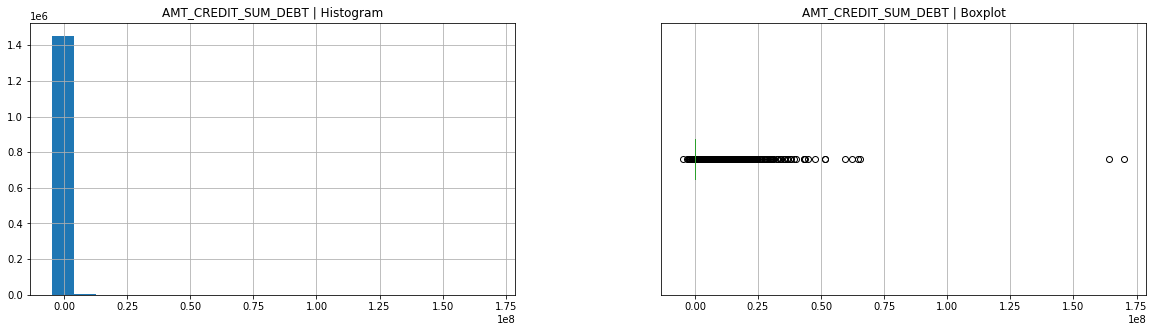

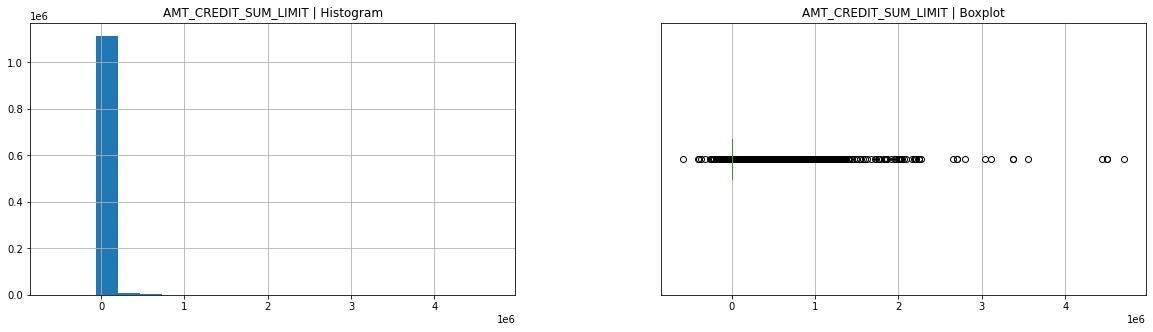

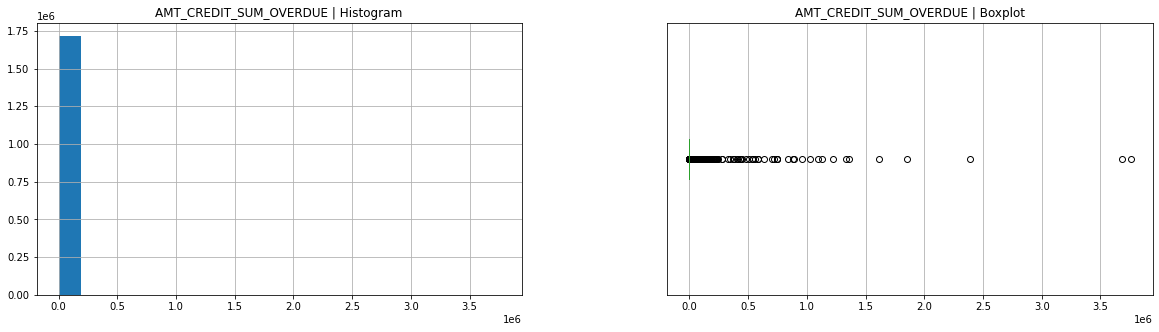

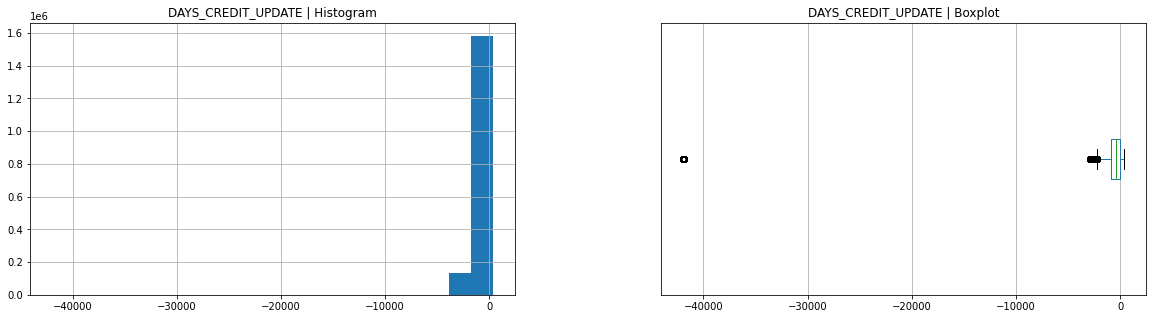

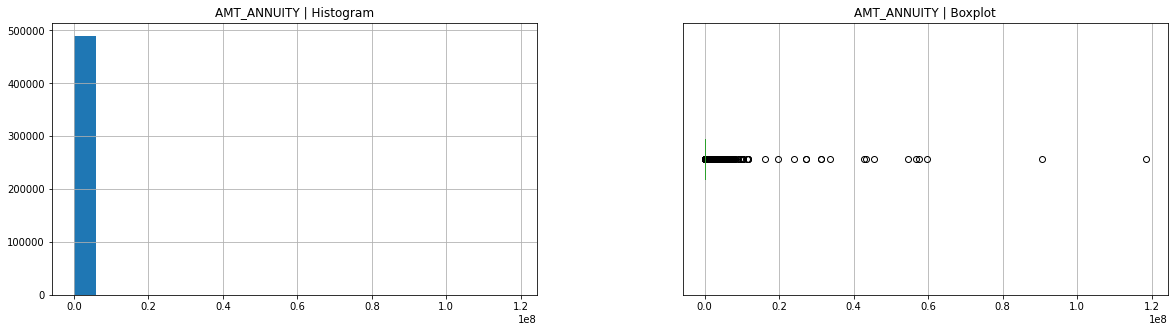

In [22]:
analyse_num(bureau,remove=["SK_ID_BUREAU","SK_ID_CURR"])

In [23]:
cat_analyser(bureau,"CNT_CREDIT_PROLONG")

CNT_CREDIT_PROLONG
     COUNT  RATE
0  1707314  0.99
1     7620  0.00
2     1222  0.00
3      191  0.00
4       54  0.00
5       21  0.00
6        2  0.00
9        2  0.00
7        1  0.00
8        1  0.00


# POS EDA

In [24]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.00,45.00,Active,0,0
1,1715348,367990,-33,36.00,35.00,Active,0,0
2,1784872,397406,-32,12.00,9.00,Active,0,0
3,1903291,269225,-35,48.00,42.00,Active,0,0
4,2341044,334279,-35,36.00,35.00,Active,0,0


Number of Variables include Missing Values: 2 



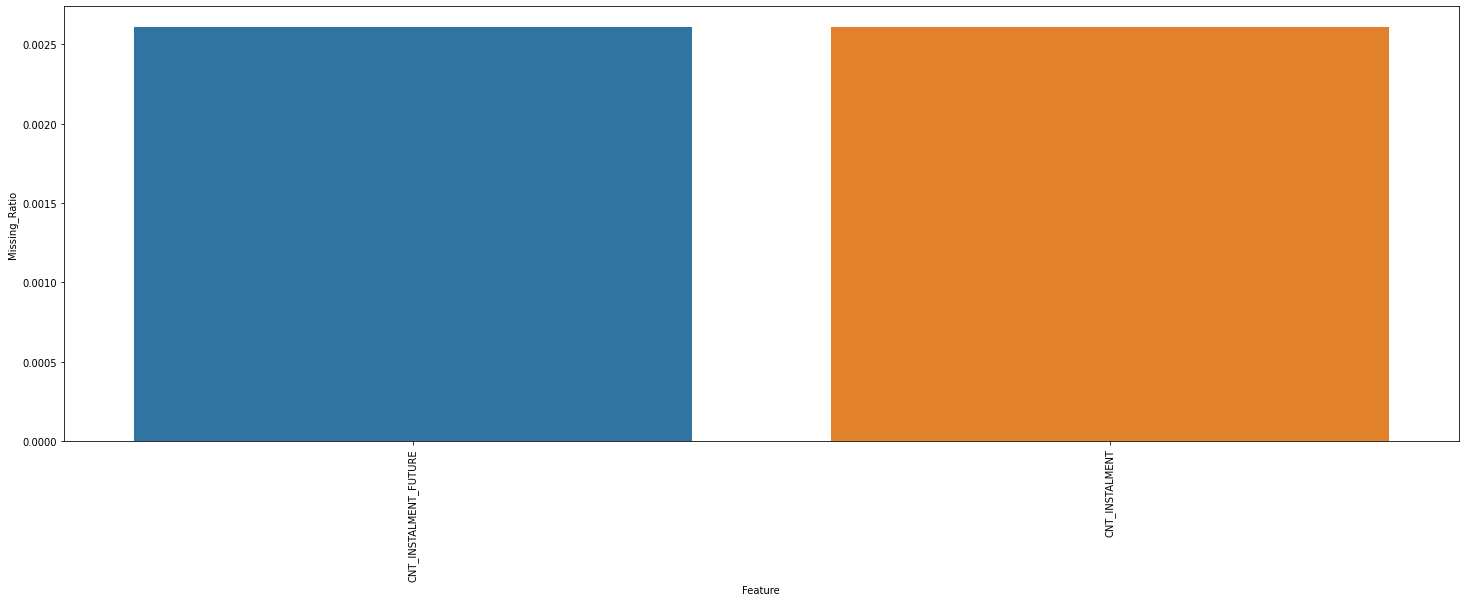

                 Feature  Num_Missing  Missing_Ratio DataTypes
0  CNT_INSTALMENT_FUTURE        26087           0.00   float64
1         CNT_INSTALMENT        26071           0.00   float64 



In [31]:
missing_values(pos,plot=True)

mean      29.66
std       24.53
min        1.00
max      295.00
median    22.00
Name: SK_ID_CURR, dtype: float64


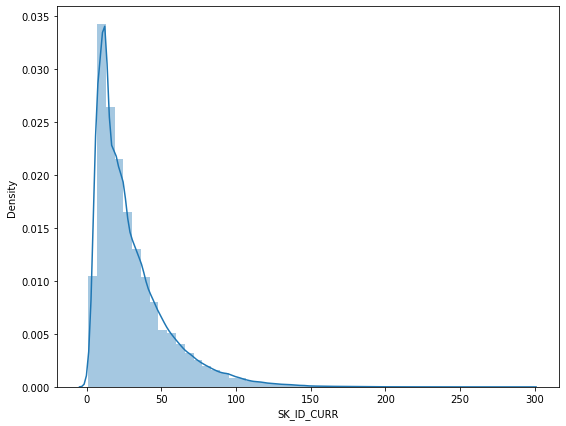

In [50]:
plot_freq_id(pos,"SK_ID_CURR")

mean     10.68
std       6.96
min       1.00
max      96.00
median   10.00
Name: SK_ID_PREV, dtype: float64


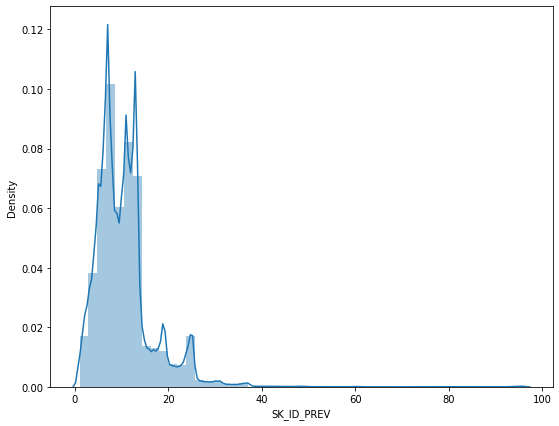

In [51]:
plot_freq_id(pos,"SK_ID_PREV")

In [25]:
cat_analyser(pos,"NAME_CONTRACT_STATUS")

NAME_CONTRACT_STATUS
                         COUNT  RATE
Active                 9151119  0.91
Completed               744883  0.07
Signed                   87260  0.01
Demand                    7065  0.00
Returned to the store     5461  0.00
Approved                  4917  0.00
Amortized debt             636  0.00
Canceled                    15  0.00
XNA                          2  0.00


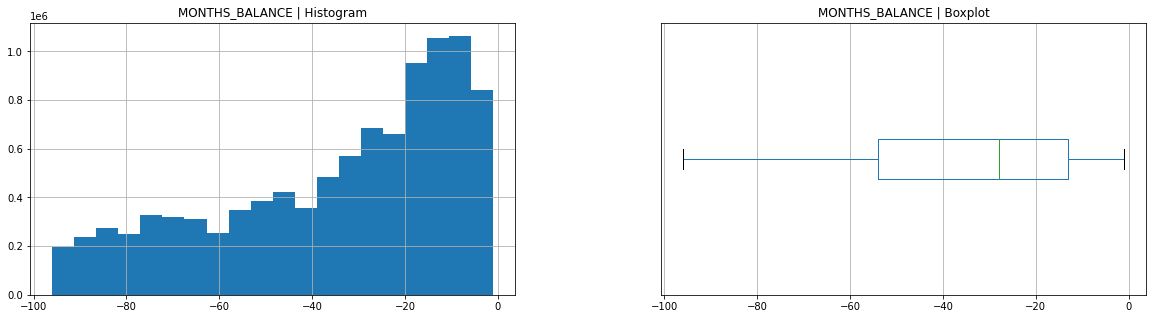

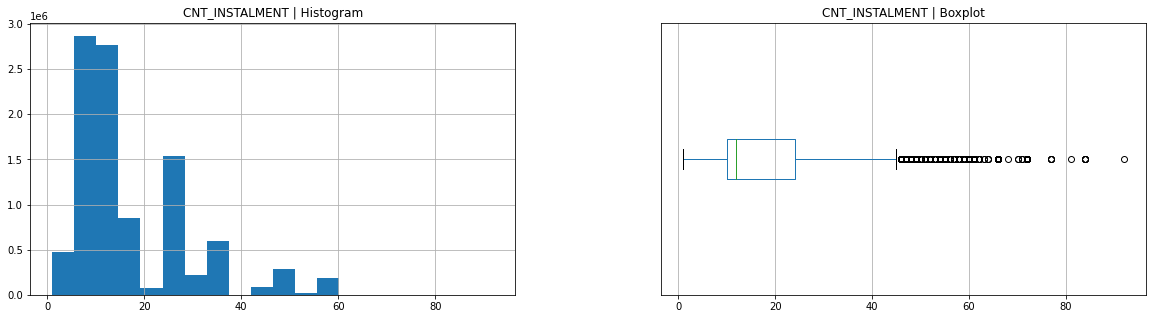

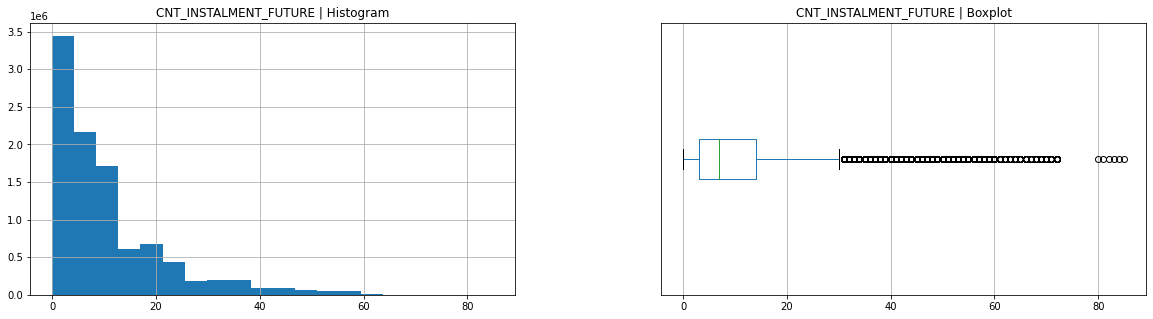

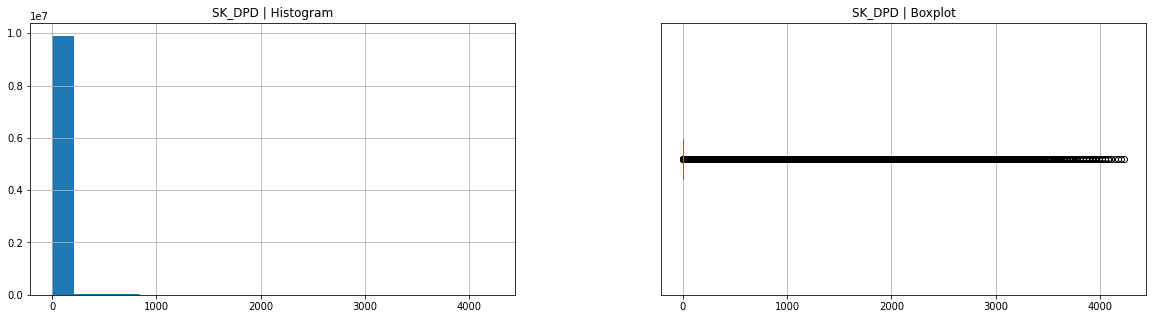

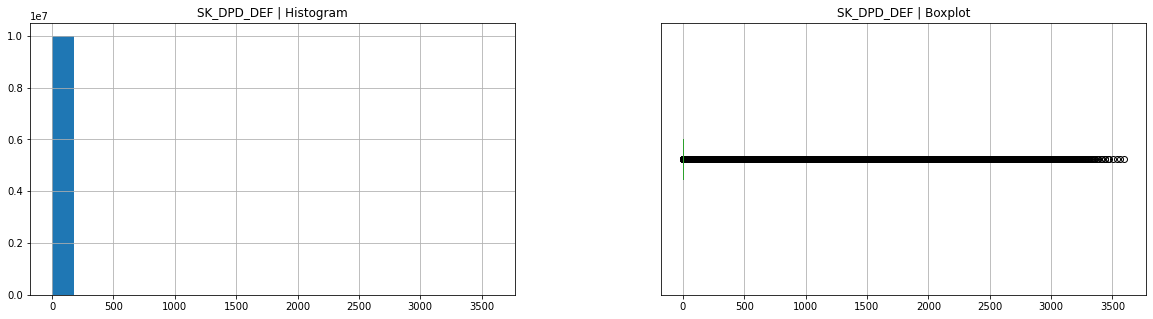

In [26]:
analyse_num(pos,remove=["SK_ID_CURR","SK_ID_PREV"])

# Installement_pay EDA

In [27]:
installments_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.00,6,"-1,180.00","-1,187.00","6,948.36","6,948.36"
1,1330831,151639,0.00,34,"-2,156.00","-2,156.00","1,716.53","1,716.53"
2,2085231,193053,2.00,1,-63.00,-63.00,"25,425.00","25,425.00"
3,2452527,199697,1.00,3,"-2,418.00","-2,426.00","24,350.13","24,350.13"
4,2714724,167756,1.00,2,"-1,383.00","-1,366.00","2,165.04","2,160.59"


Number of Variables include Missing Values: 4 



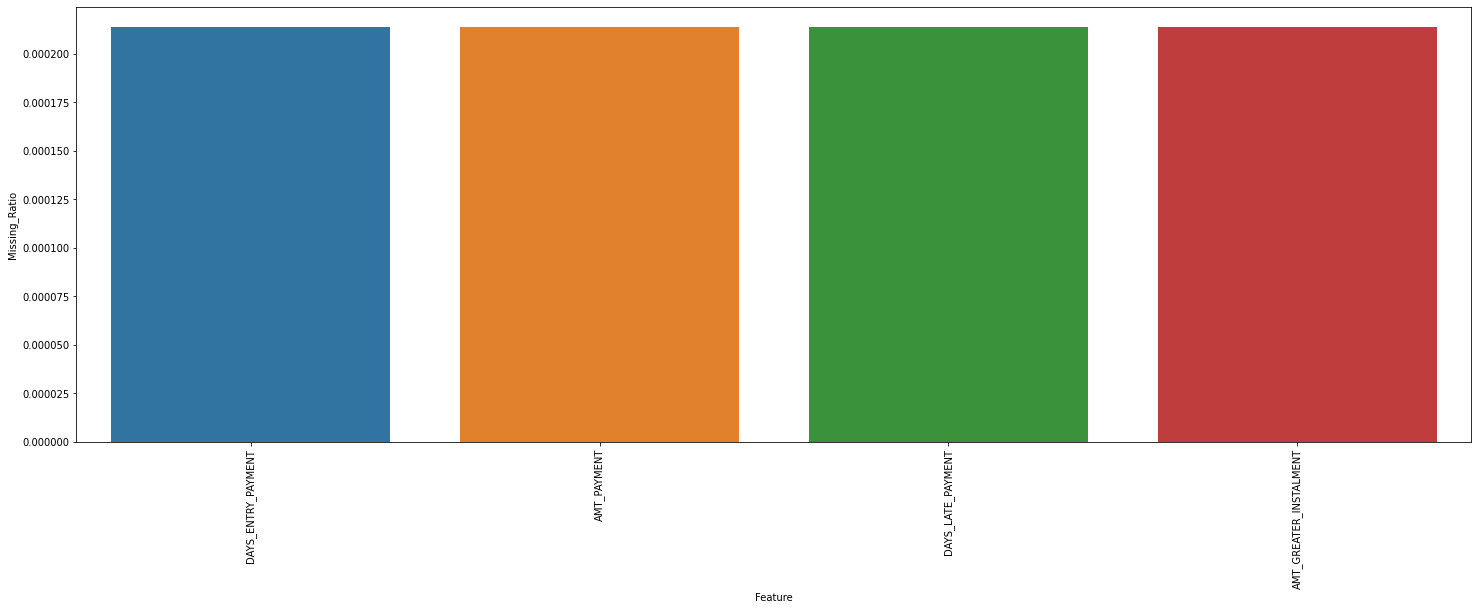

                  Feature  Num_Missing  Missing_Ratio DataTypes
0      DAYS_ENTRY_PAYMENT         2905           0.00   float64
1             AMT_PAYMENT         2905           0.00   float64
2       DAYS_LATE_PAYMENT         2905           0.00   float64
3  AMT_GREATER_INSTALMENT         2905           0.00   float64 



In [34]:
missing_values(installments_pay,plot=True)

mean      40.06
std       41.05
min        1.00
max      372.00
median    25.00
Name: SK_ID_CURR, dtype: float64


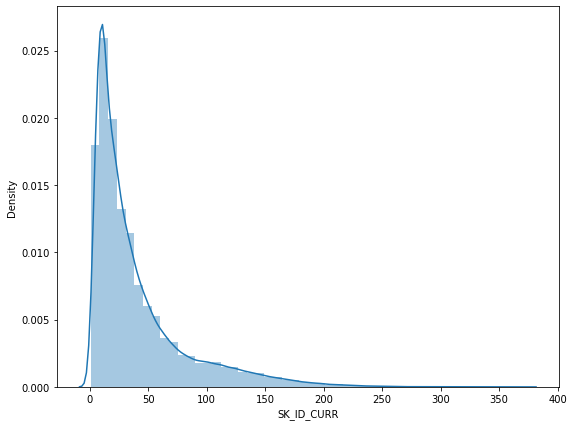

In [52]:
plot_freq_id(installments_pay,"SK_ID_CURR")

mean      13.64
std       17.59
min        1.00
max      293.00
median    10.00
Name: SK_ID_PREV, dtype: float64


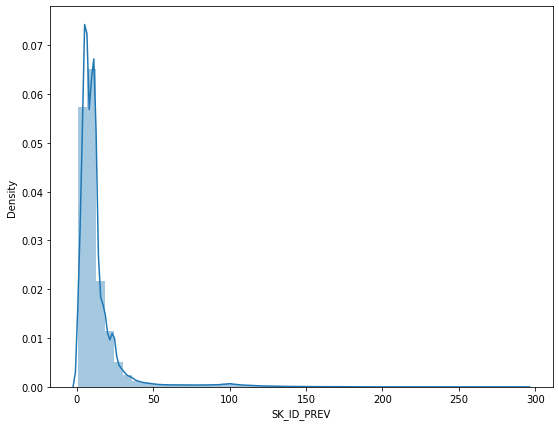

In [53]:
plot_freq_id(installments_pay,"SK_ID_PREV")

In [28]:
# Feature Engenerring

# All_value is négative for DAYS_ENTRY_PAYMENT & DAYS_INSTALMENT
installments_pay["DAYS_LATE_PAYMENT"] = abs(installments_pay["DAYS_INSTALMENT"]) - abs(installments_pay["DAYS_ENTRY_PAYMENT"]) 
# Example : DAYS_LATE_PAYMENT = 2 => 2 day payment after due date

# Create diff amount instalment amount payment to get amount of late payment
installments_pay["AMT_GREATER_INSTALMENT"] = installments_pay["AMT_INSTALMENT"] - installments_pay["AMT_PAYMENT"]
# Example : AMT_GREATER_INSTALMENT = 50 => 50 more than the instalment plan AMT_GREATER_INSTALMENT

In [29]:
installments_pay.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_LATE_PAYMENT,AMT_GREATER_INSTALMENT
0,1054186,161674,1.00,6,"-1,180.00","-1,187.00","6,948.36","6,948.36",-7.00,0.00
1,1330831,151639,0.00,34,"-2,156.00","-2,156.00","1,716.53","1,716.53",0.00,0.00
2,2085231,193053,2.00,1,-63.00,-63.00,"25,425.00","25,425.00",0.00,0.00
3,2452527,199697,1.00,3,"-2,418.00","-2,426.00","24,350.13","24,350.13",-8.00,0.00
4,2714724,167756,1.00,2,"-1,383.00","-1,366.00","2,165.04","2,160.59",17.00,4.45
5,1137312,164489,1.00,12,"-1,384.00","-1,417.00","5,970.38","5,970.38",-33.00,0.00
6,2234264,184693,4.00,11,-349.00,-352.00,"29,432.29","29,432.29",-3.00,0.00
7,1818599,111420,2.00,4,-968.00,-994.00,"17,862.17","17,862.17",-26.00,0.00
8,2723183,112102,0.00,14,-197.00,-197.00,70.74,70.74,0.00,0.00
9,1413990,109741,1.00,4,-570.00,-609.00,"14,308.47","14,308.47",-39.00,0.00


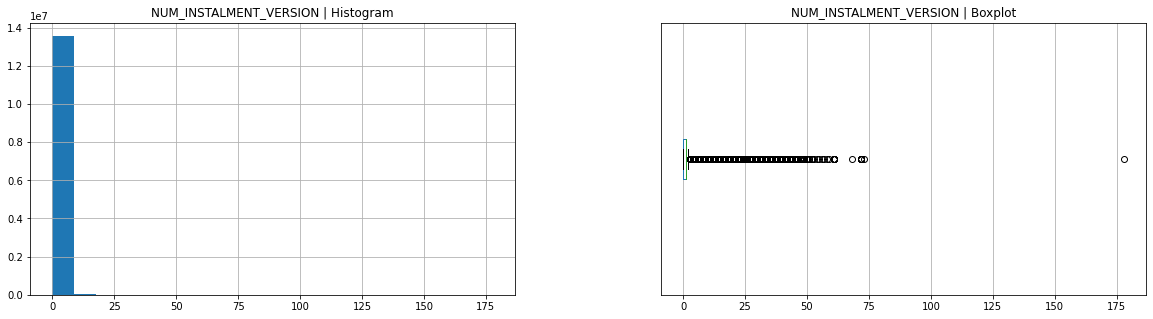

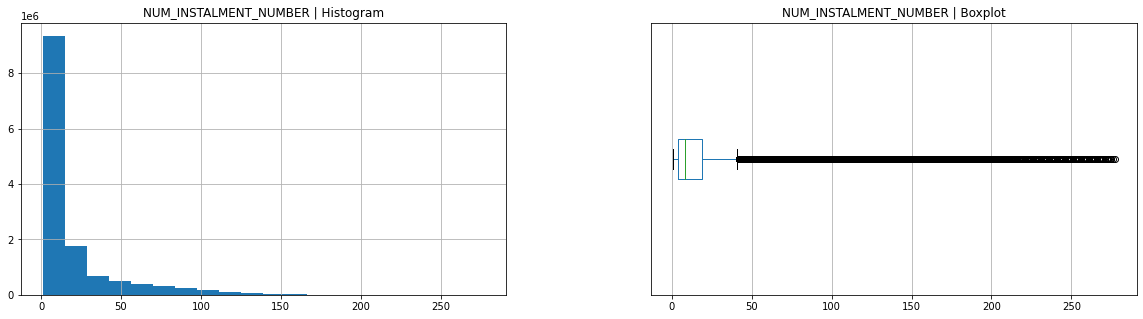

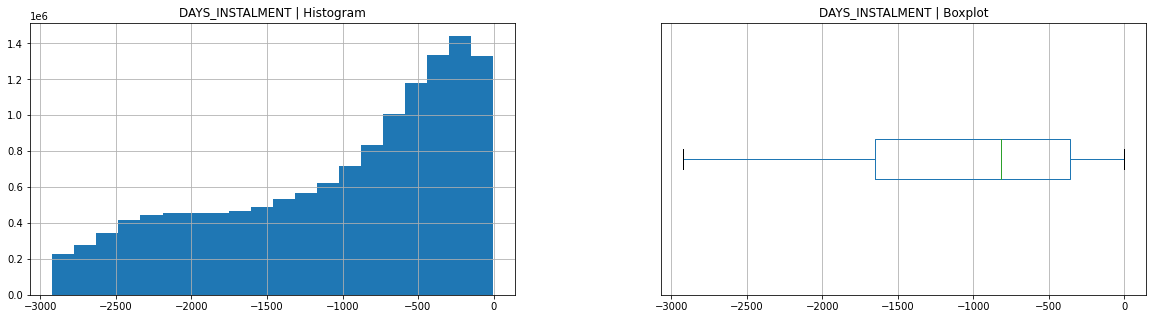

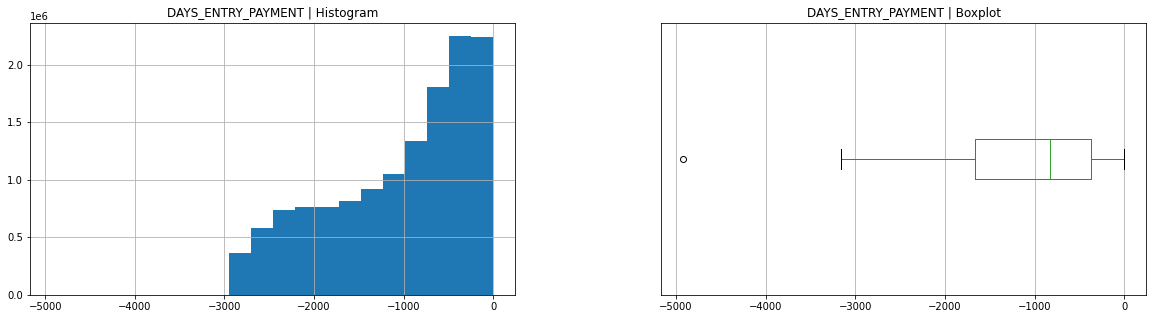

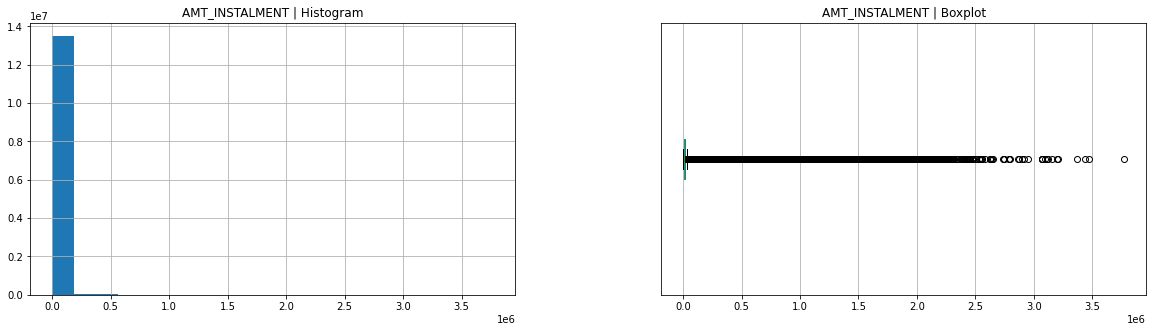

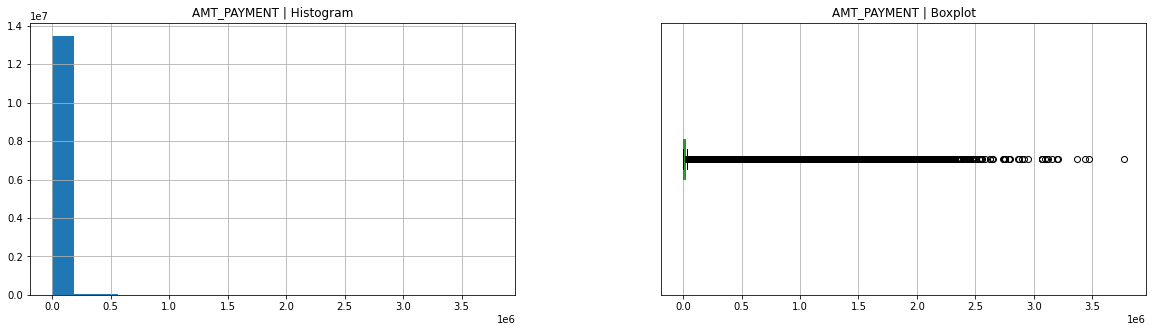

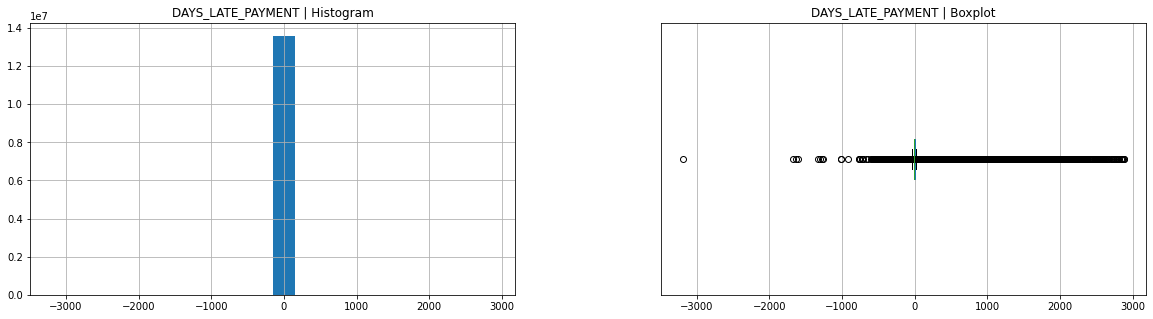

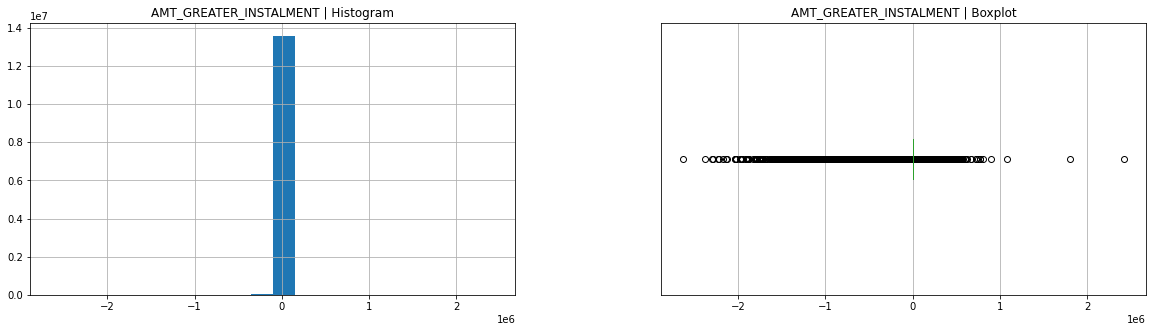

In [30]:
analyse_num(installments_pay,remove=["SK_ID_CURR","SK_ID_PREV"])

# Credit card balance EDA

In [35]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33","1,800.00","1,800.00",0.00,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00","2,250.00","2,250.00","60,175.08","64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00","2,250.00","2,250.00","26,926.42","31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76","11,925.00","11,925.00","224,949.29","233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89","27,000.00","27,000.00","443,044.40","453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0


Number of Variables include Missing Values: 9 



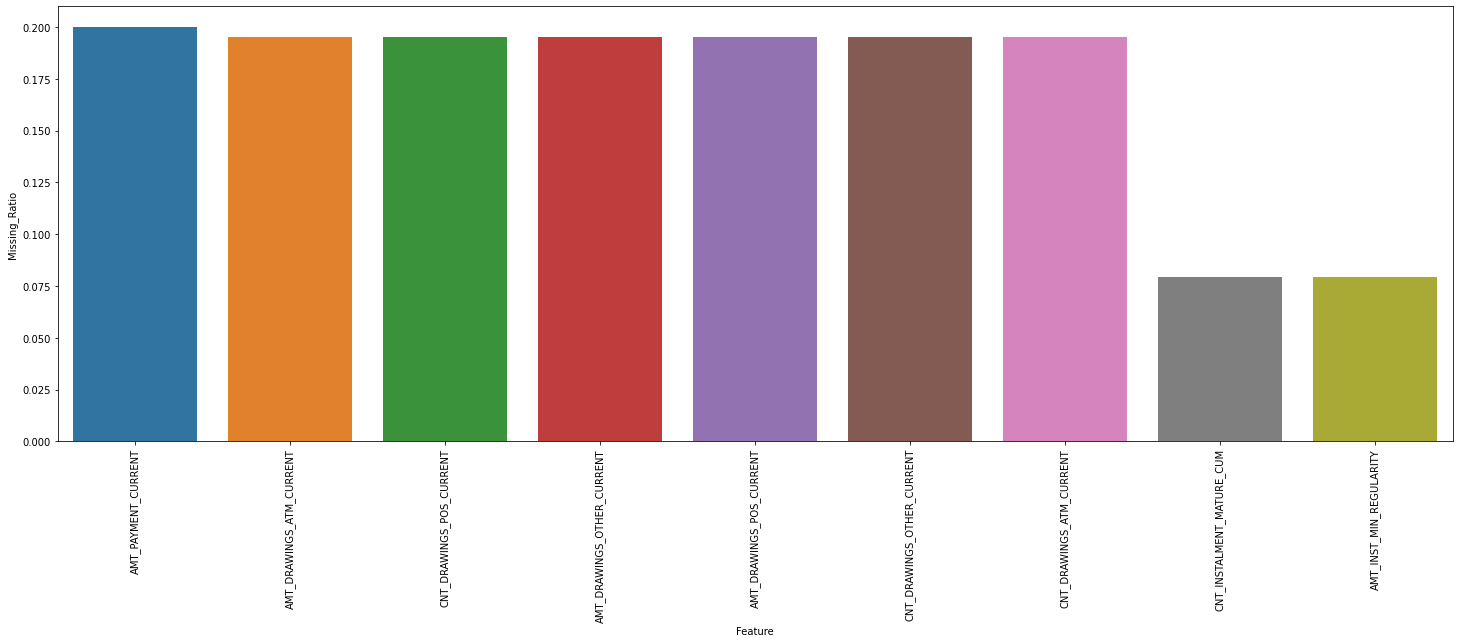

                      Feature  Num_Missing  Missing_Ratio DataTypes
0         AMT_PAYMENT_CURRENT       767988           0.20   float64
1    AMT_DRAWINGS_ATM_CURRENT       749816           0.20   float64
2    CNT_DRAWINGS_POS_CURRENT       749816           0.20   float64
3  AMT_DRAWINGS_OTHER_CURRENT       749816           0.20   float64
4    AMT_DRAWINGS_POS_CURRENT       749816           0.20   float64
5  CNT_DRAWINGS_OTHER_CURRENT       749816           0.20   float64
6    CNT_DRAWINGS_ATM_CURRENT       749816           0.20   float64
7   CNT_INSTALMENT_MATURE_CUM       305236           0.08   float64
8     AMT_INST_MIN_REGULARITY       305236           0.08   float64 



In [36]:
missing_values(credit_card_balance,plot=True)

mean      37.08
std       33.48
min        1.00
max      192.00
median    22.00
Name: SK_ID_CURR, dtype: float64


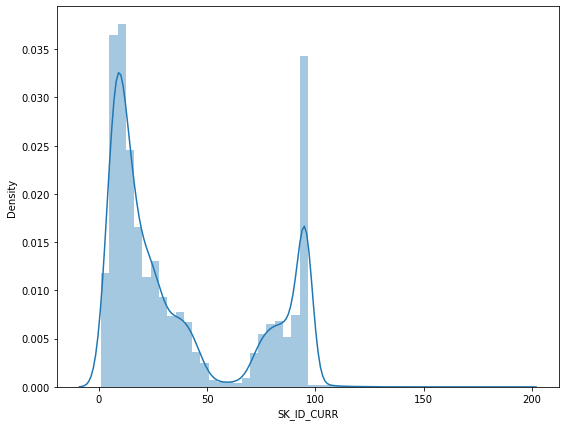

In [54]:
plot_freq_id(credit_card_balance,"SK_ID_CURR")

mean     36.82
std      33.36
min       1.00
max      96.00
median   21.00
Name: SK_ID_PREV, dtype: float64


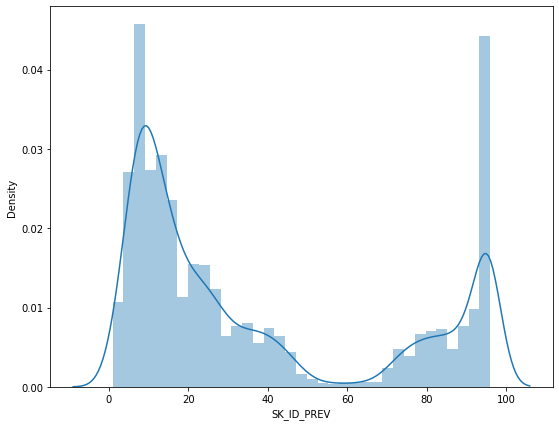

In [55]:
plot_freq_id(credit_card_balance,"SK_ID_PREV")

In [37]:
cat_analyser(credit_card_balance,"NAME_CONTRACT_STATUS")

NAME_CONTRACT_STATUS
                 COUNT  RATE
Active         3698436  0.96
Completed       128918  0.03
Signed           11058  0.00
Demand            1365  0.00
Sent proposal      513  0.00
Refused             17  0.00
Approved             5  0.00


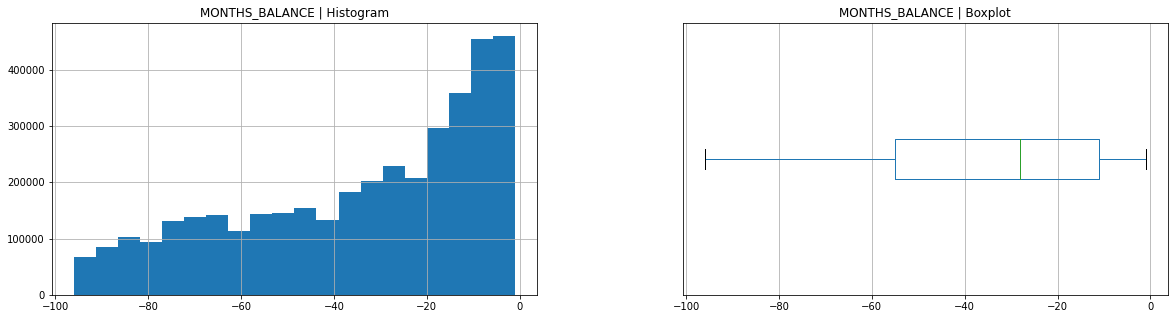

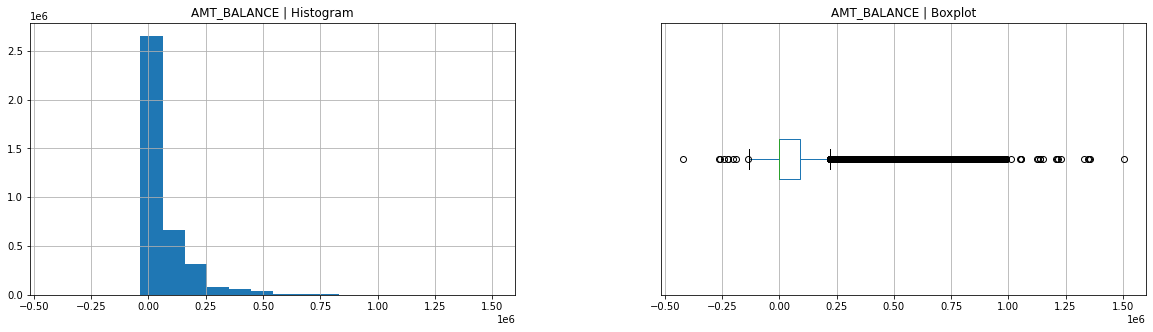

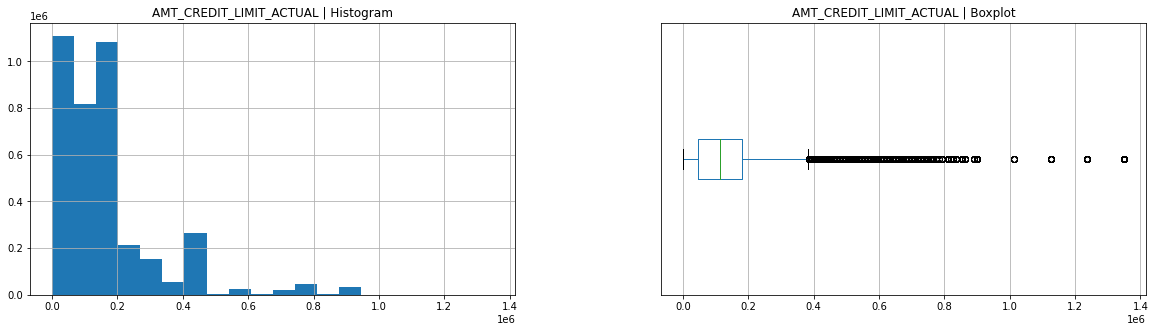

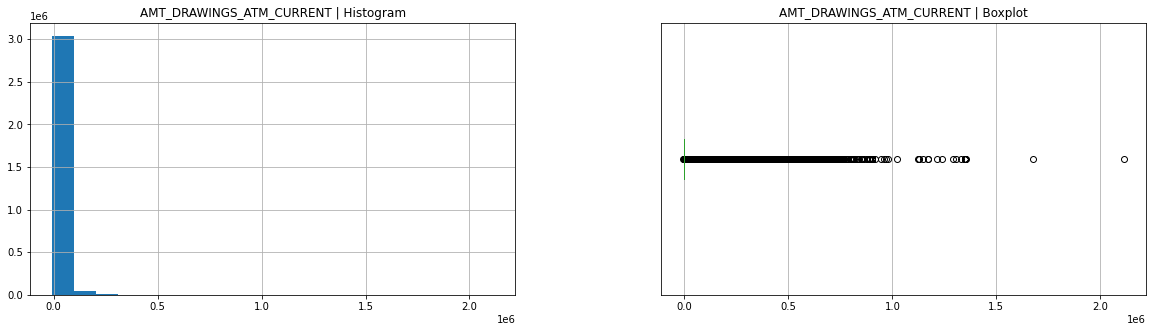

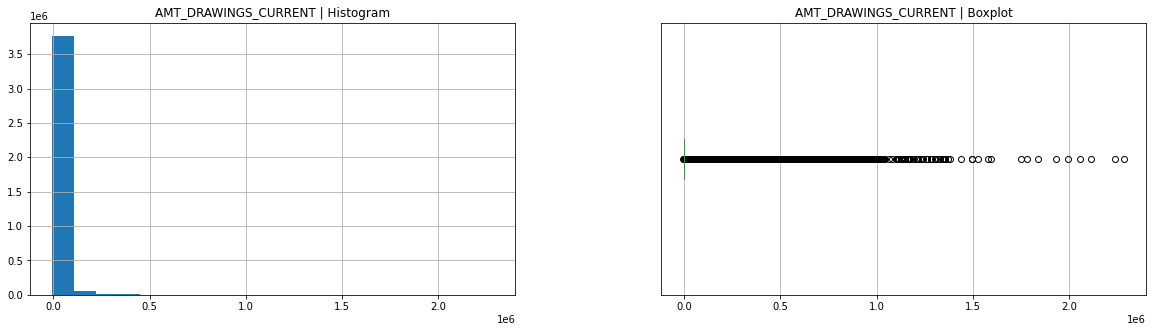

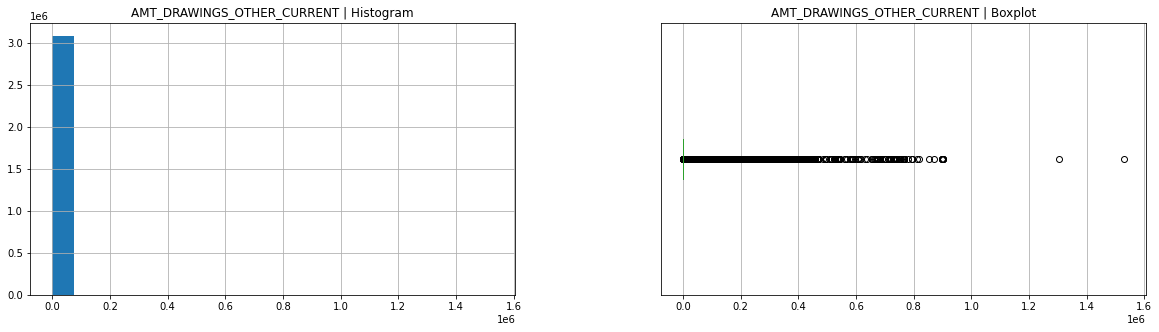

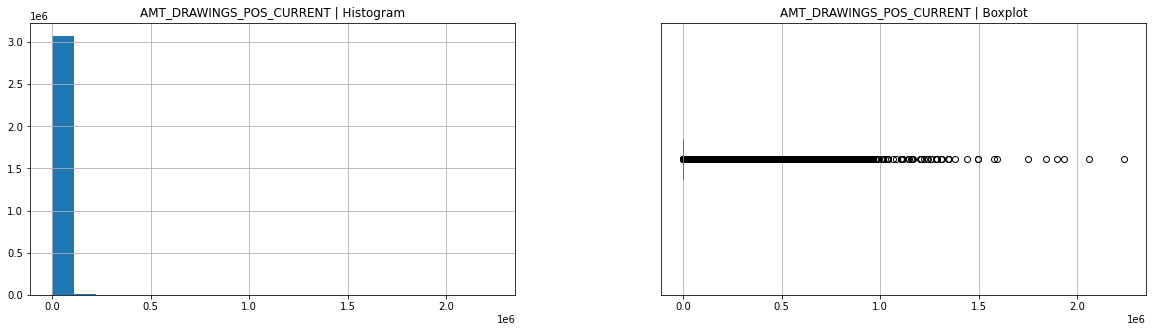

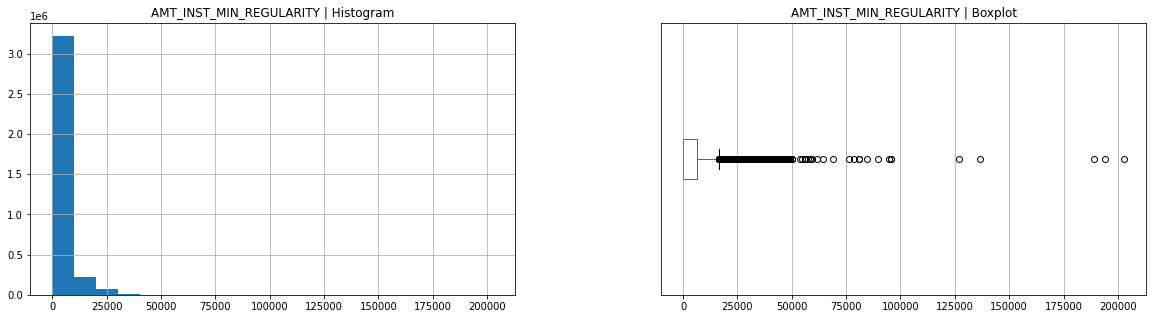

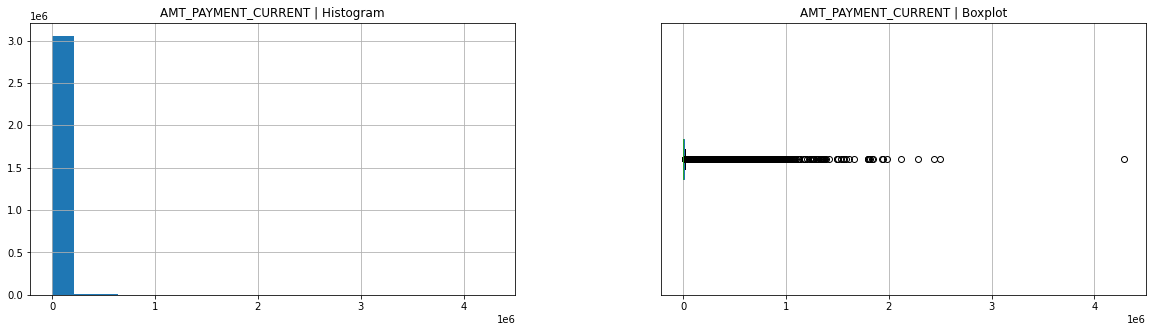

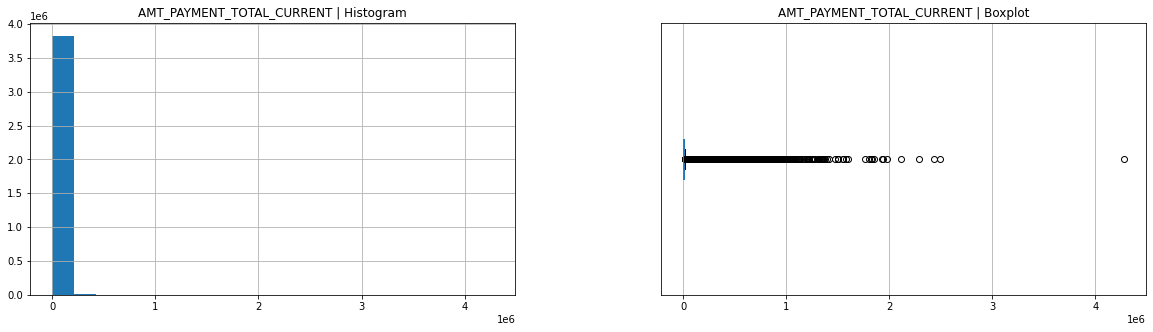

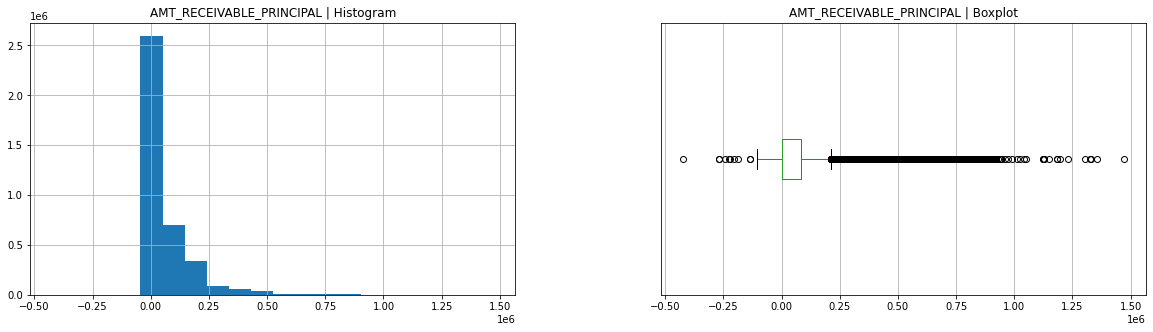

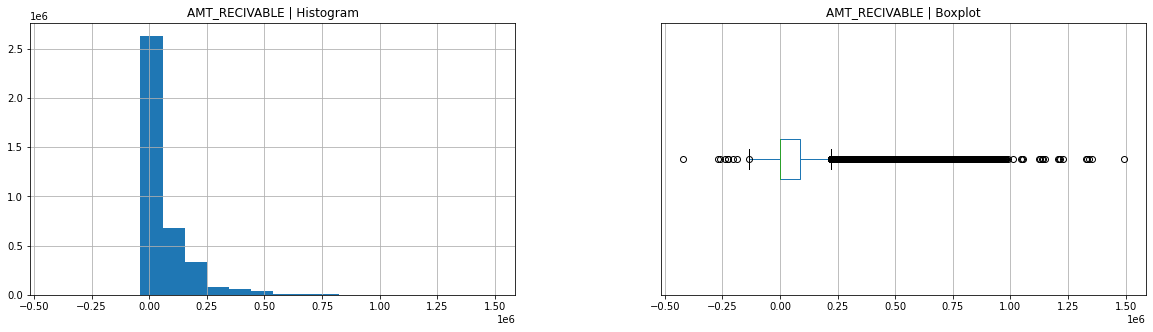

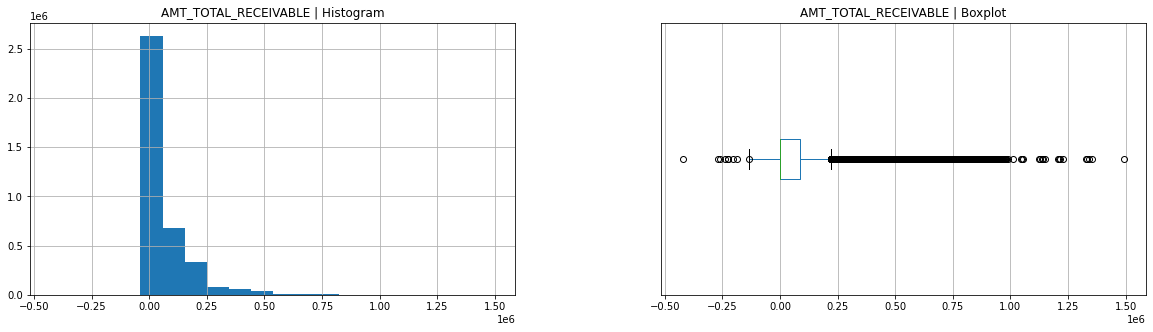

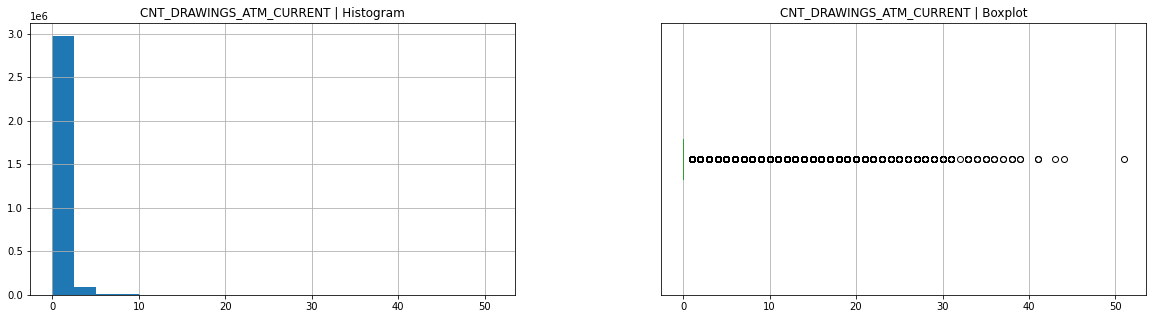

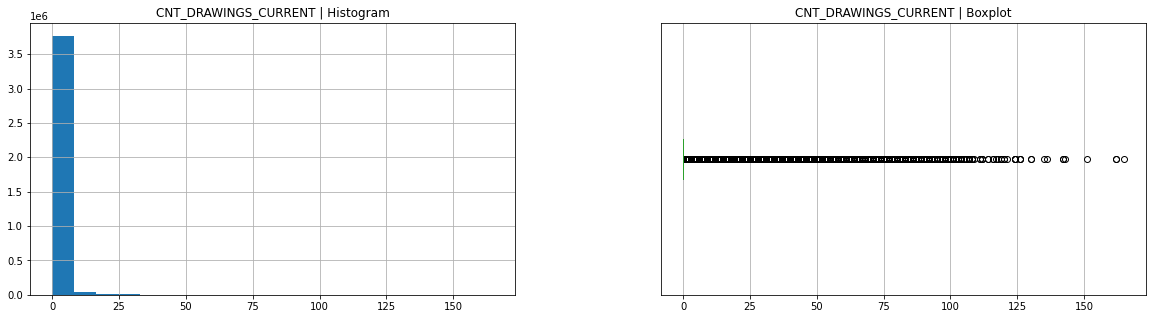

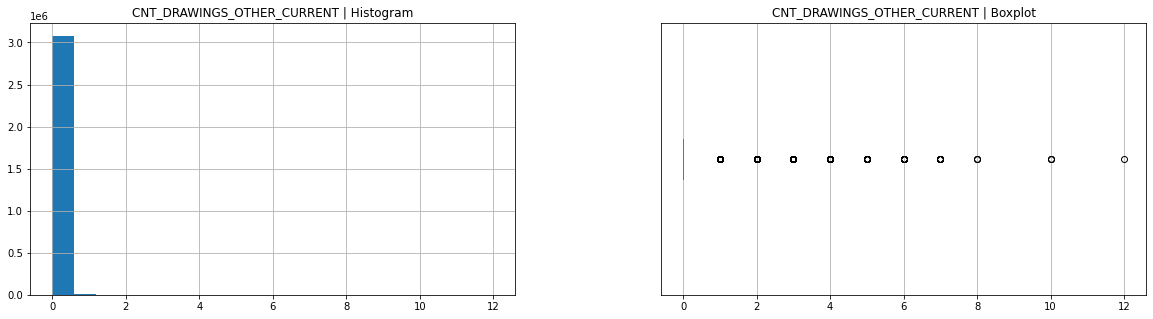

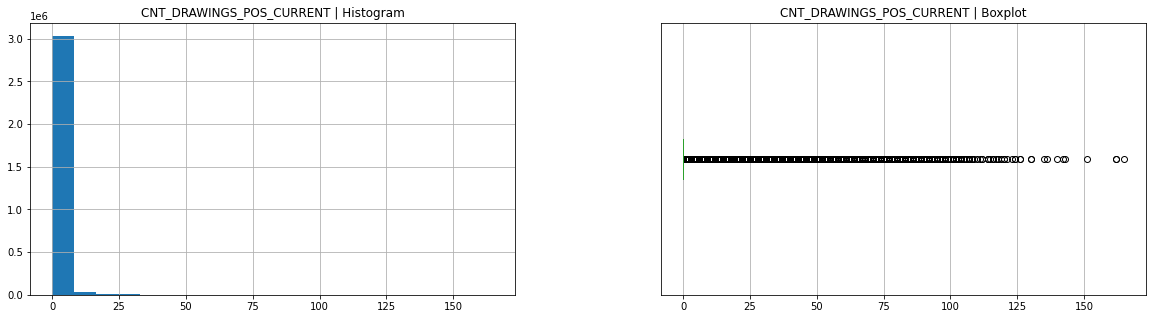

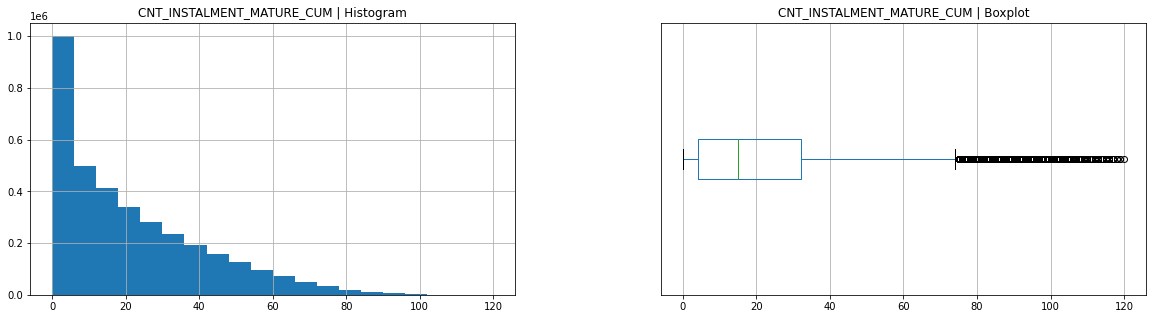

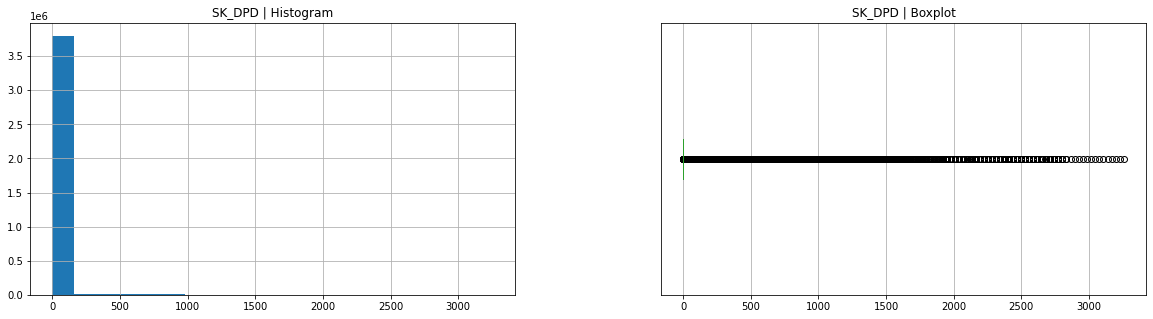

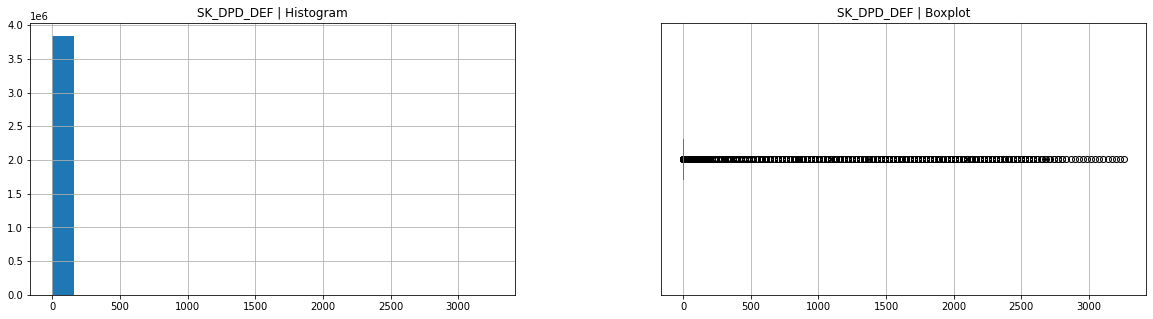

In [39]:
analyse_num(credit_card_balance,remove=["SK_ID_PREV","SK_ID_CURR"])

In [40]:
cat_analyser(credit_card_balance,"CNT_DRAWINGS_ATM_CURRENT")

CNT_DRAWINGS_ATM_CURRENT
         COUNT  RATE
0.00   2665718  0.86
1.00    213460  0.07
2.00     95647  0.03
3.00     46730  0.02
4.00     26335  0.01
5.00     14910  0.00
6.00      9179  0.00
7.00      5718  0.00
8.00      3992  0.00
9.00      2427  0.00
10.00     1876  0.00
11.00     1164  0.00
12.00      826  0.00
13.00      604  0.00
14.00      442  0.00
15.00      345  0.00
16.00      274  0.00
17.00      188  0.00
18.00      157  0.00
19.00      112  0.00
20.00       96  0.00
21.00       66  0.00
22.00       49  0.00
23.00       32  0.00
24.00       24  0.00
25.00       20  0.00
27.00       17  0.00
28.00       15  0.00
26.00       12  0.00
29.00       12  0.00
31.00       11  0.00
30.00        9  0.00
33.00        5  0.00
35.00        4  0.00
34.00        4  0.00
38.00        3  0.00
36.00        3  0.00
41.00        2  0.00
39.00        2  0.00
37.00        2  0.00
32.00        1  0.00
44.00        1  0.00
43.00        1  0.00
51.00        1  0.00


# Previous app EDA

In [56]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00",0.00,"17,145.00",SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,"365,243.00",-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00",NaN,"607,500.00",THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,"365,243.00",-134.00,916.00,"365,243.00","365,243.00",1.00
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50",NaN,"112,500.00",TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,"365,243.00",-271.00,59.00,"365,243.00","365,243.00",1.00
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00",NaN,"450,000.00",MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,"365,243.00",-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00",NaN,"337,500.00",THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Number of Variables include Missing Values: 16 



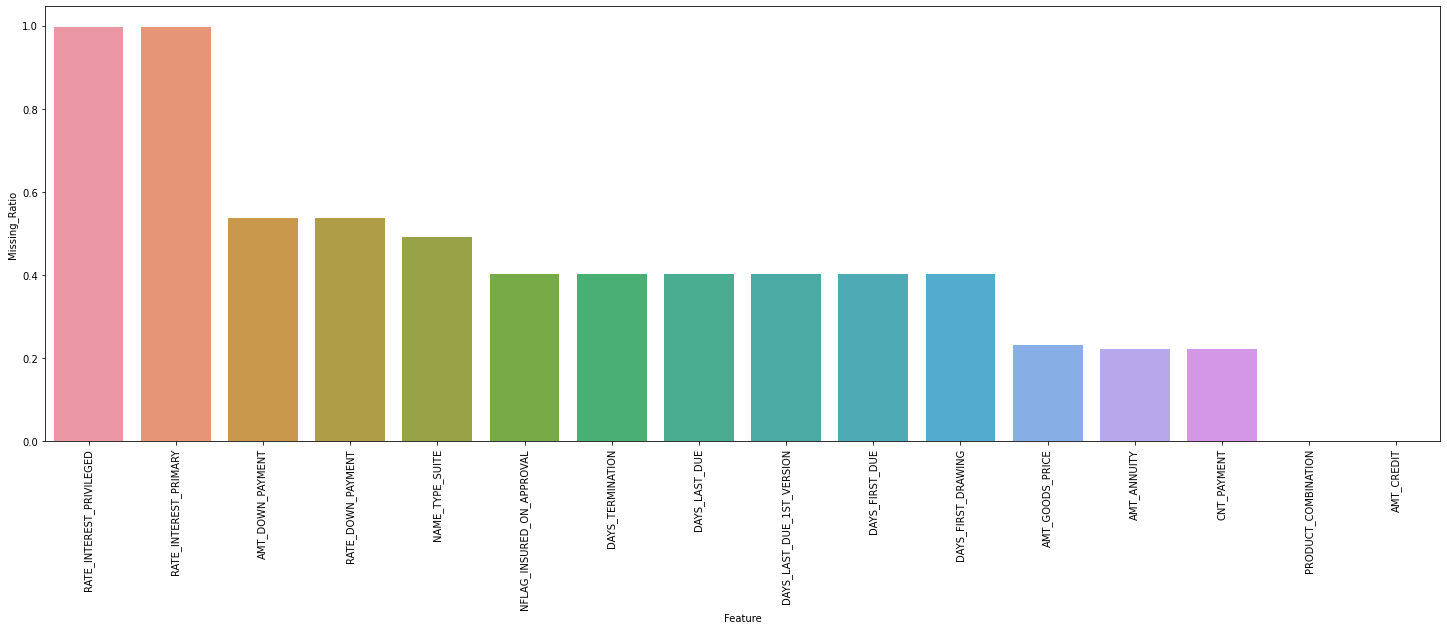

                      Feature  Num_Missing  Missing_Ratio DataTypes
0    RATE_INTEREST_PRIVILEGED      1664263           1.00   float64
1       RATE_INTEREST_PRIMARY      1664263           1.00   float64
2            AMT_DOWN_PAYMENT       895844           0.54   float64
3           RATE_DOWN_PAYMENT       895844           0.54   float64
4             NAME_TYPE_SUITE       820405           0.49    object
5   NFLAG_INSURED_ON_APPROVAL       673065           0.40   float64
6            DAYS_TERMINATION       673065           0.40   float64
7               DAYS_LAST_DUE       673065           0.40   float64
8   DAYS_LAST_DUE_1ST_VERSION       673065           0.40   float64
9              DAYS_FIRST_DUE       673065           0.40   float64
10         DAYS_FIRST_DRAWING       673065           0.40   float64
11            AMT_GOODS_PRICE       385515           0.23   float64
12                AMT_ANNUITY       372235           0.22   float64
13                CNT_PAYMENT       372230      

In [58]:
missing_values(prev,plot=True)

In [62]:
prev.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY"],axis=1,inplace=True)

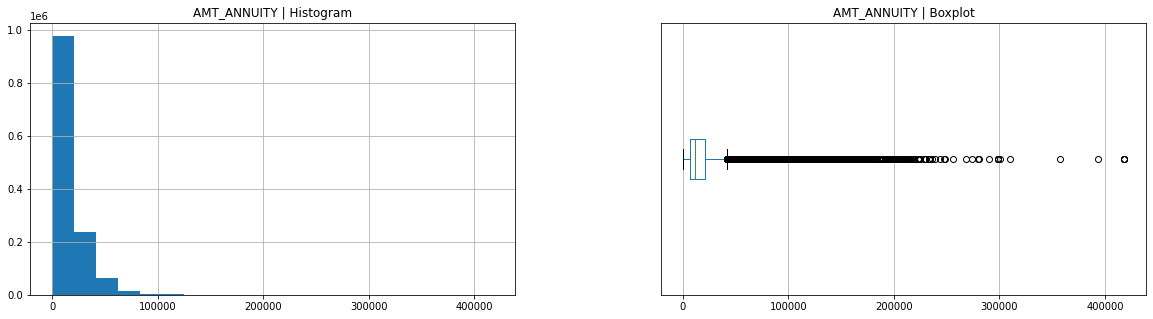

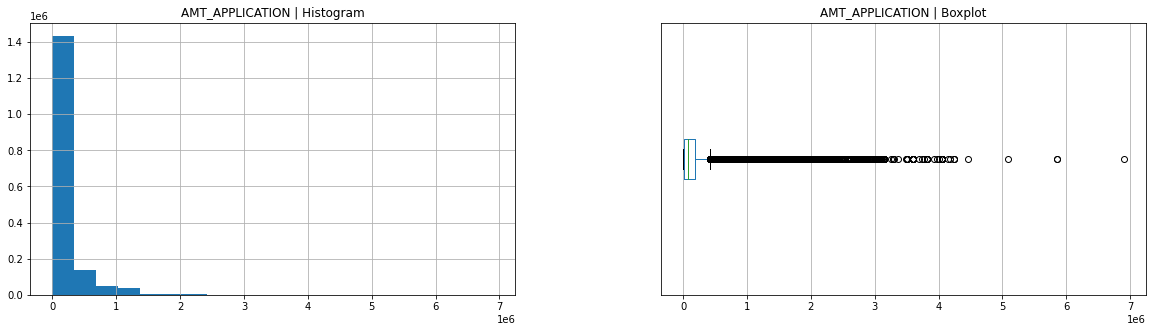

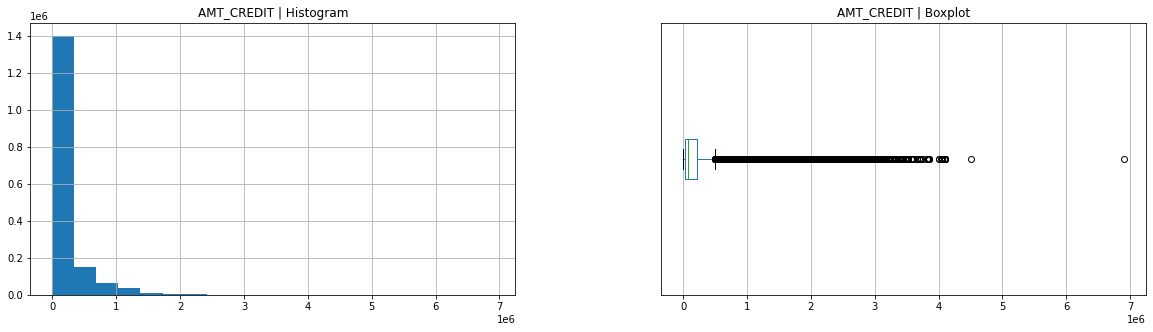

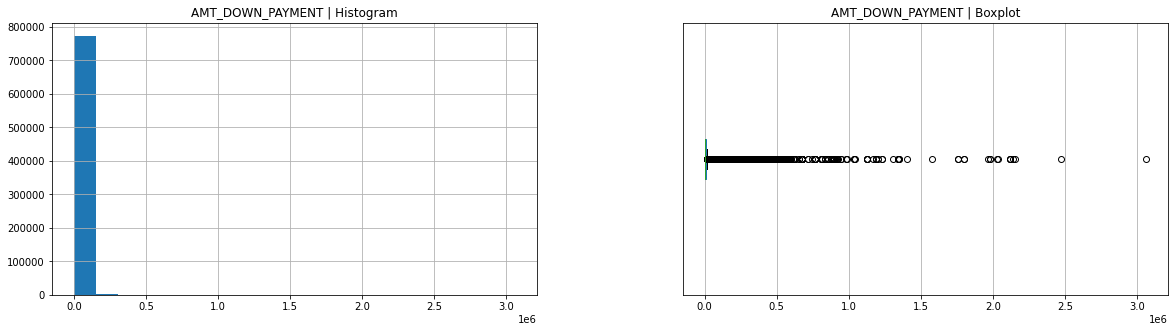

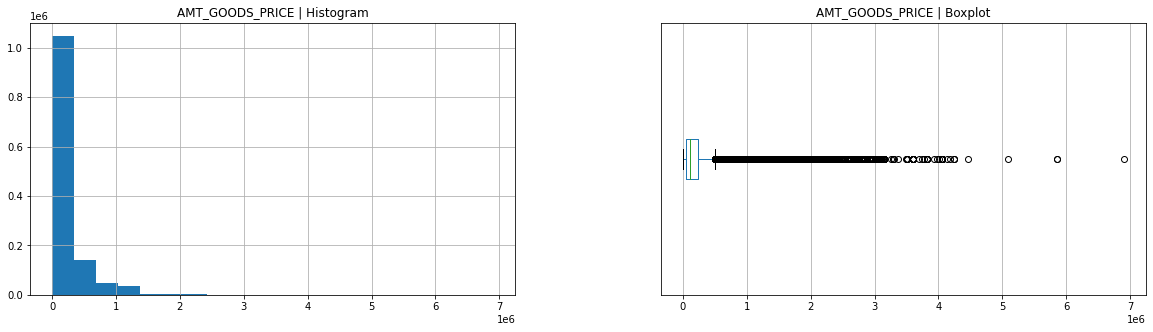

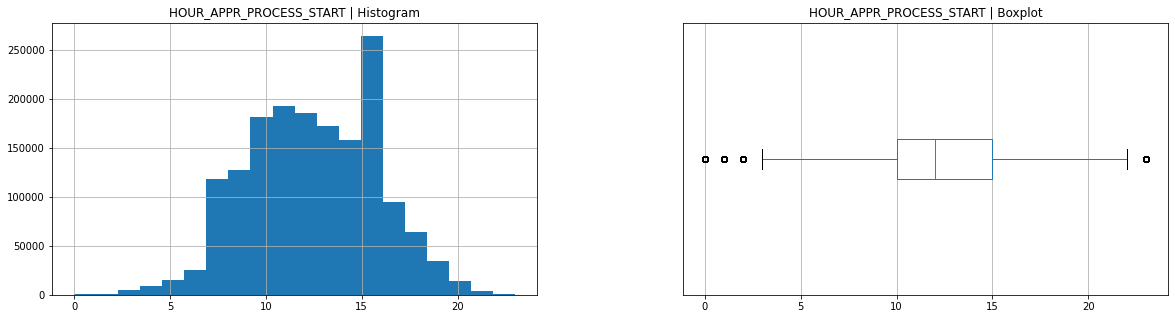

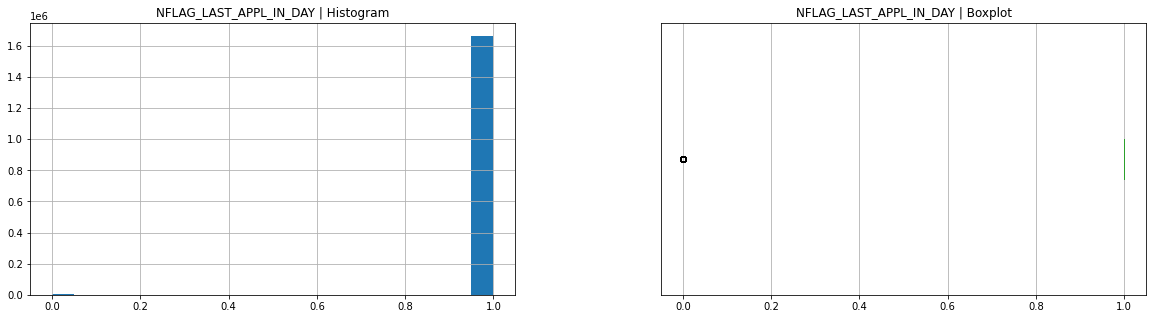

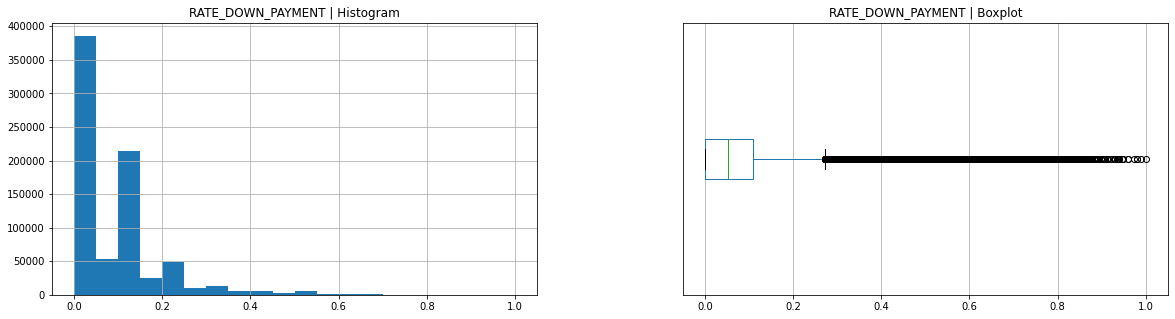

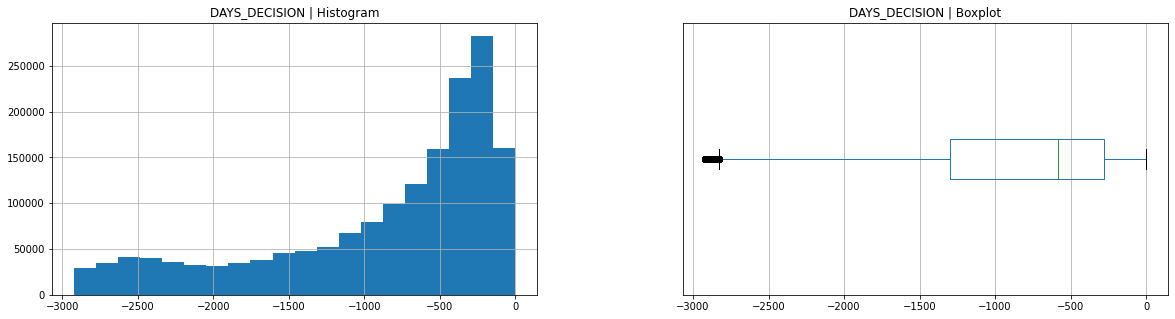

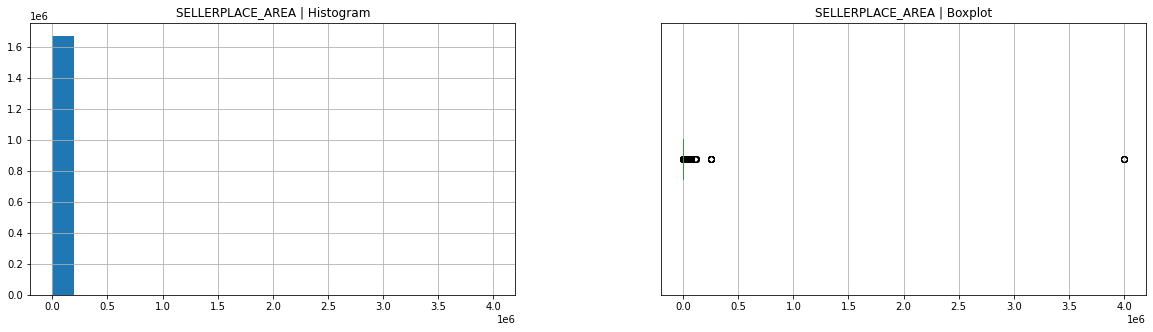

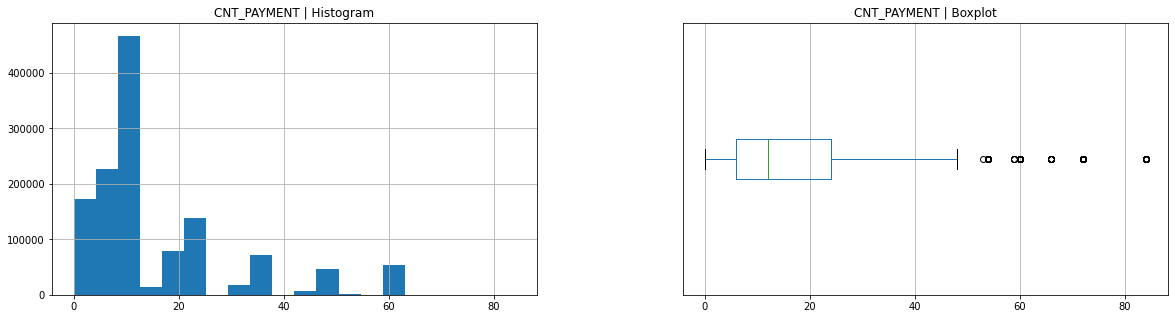

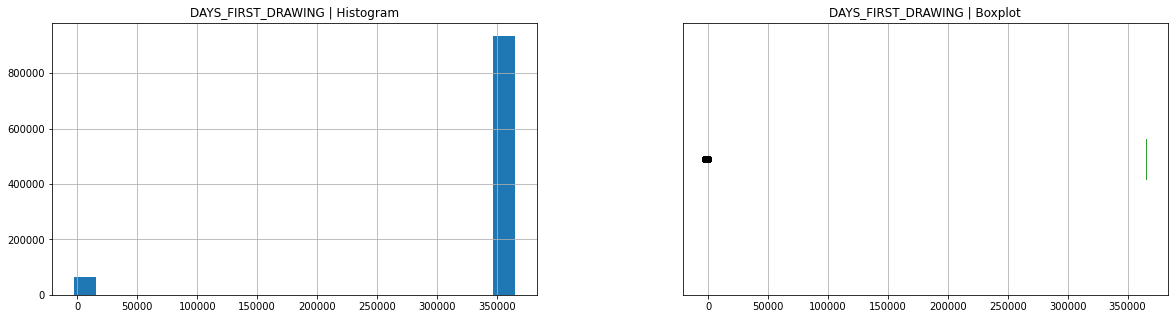

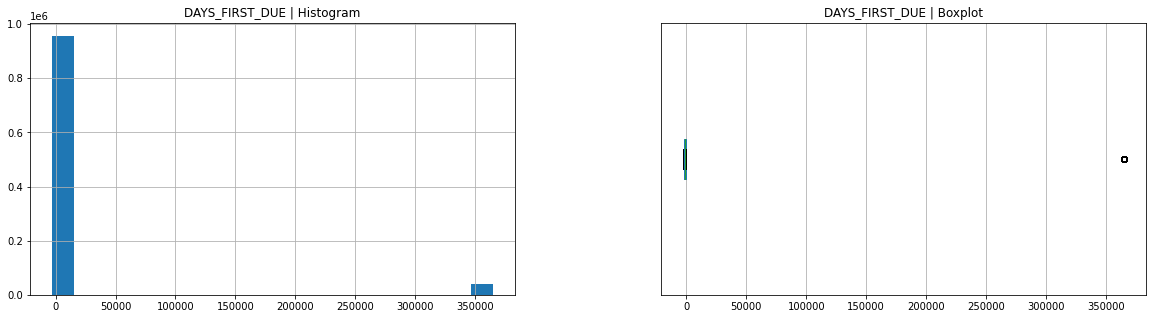

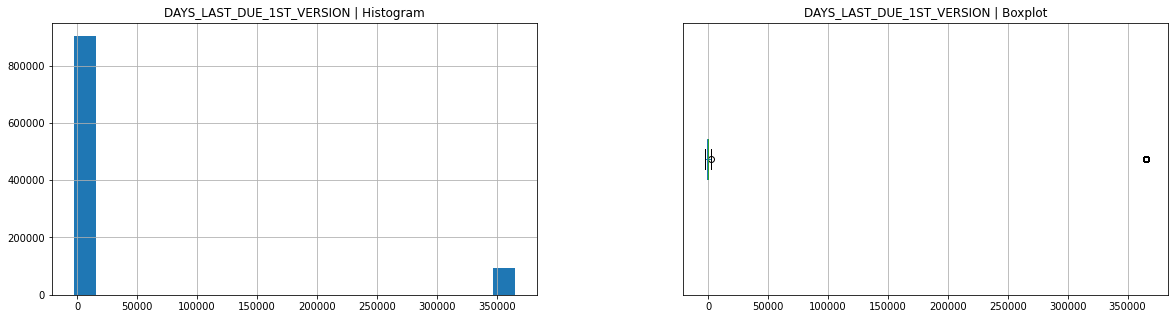

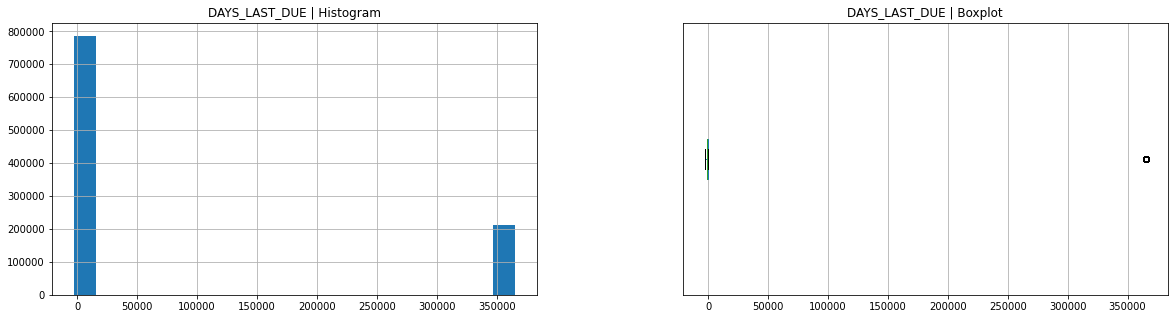

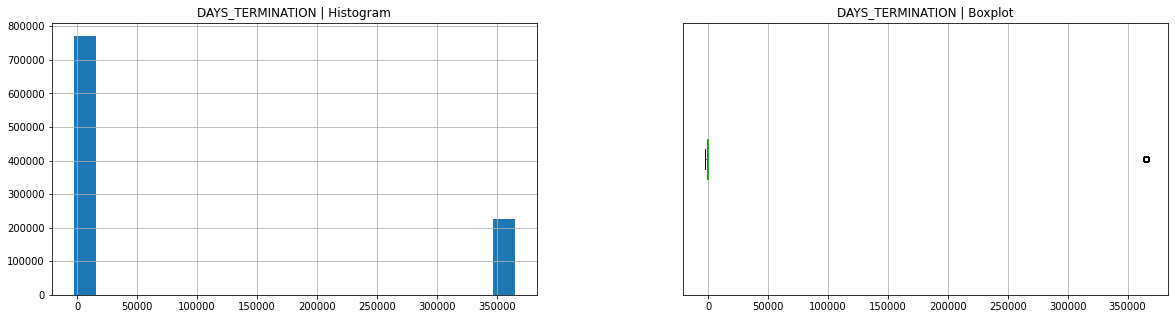

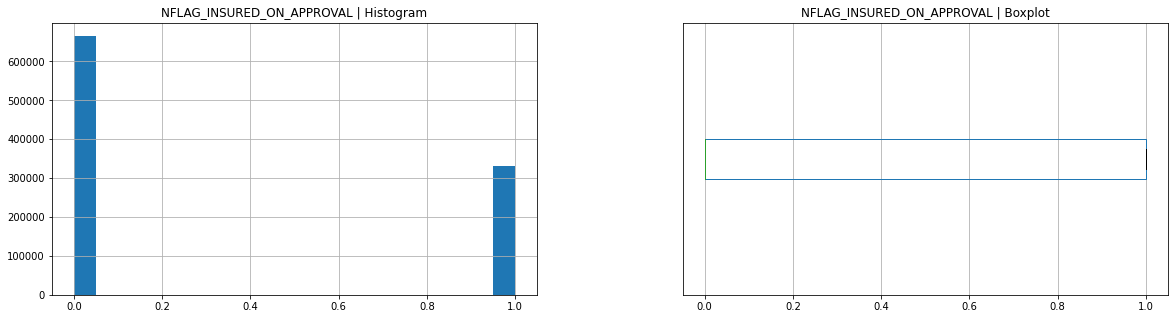

In [63]:
analyse_num(prev,remove=["SK_ID_CURR","SK_ID_PREV"])

In [67]:
for cat_col in prev.select_dtypes("object").columns:
    cat_analyser(prev,cat_col)
    print("-"*50)

NAME_CONTRACT_TYPE
                  COUNT  RATE
Cash loans       747553  0.45
Consumer loans   729151  0.44
Revolving loans  193164  0.12
XNA                 346  0.00
--------------------------------------------------
WEEKDAY_APPR_PROCESS_START
            COUNT  RATE
TUESDAY    255118  0.15
WEDNESDAY  255010  0.15
MONDAY     253557  0.15
FRIDAY     252048  0.15
THURSDAY   249099  0.15
SATURDAY   240631  0.14
SUNDAY     164751  0.10
--------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT
     COUNT  RATE
Y  1661739  0.99
N     8475  0.01
--------------------------------------------------
NAME_CASH_LOAN_PURPOSE
                                   COUNT  RATE
XAP                               922661  0.55
XNA                               677918  0.41
Repairs                            23765  0.01
Other                              15608  0.01
Urgent needs                        8412  0.01
Buying a used car                   2888  0.00
Building a house or an annex

## Outlier

In [ ]:
# DAYS_FIRST_DUE

# DAYS_lAST_DUE_1ST_VERSION

# DAYS_LAST_DUE

# DAYS_TERMINATION

# SELLERPLACE_AREA

# DAYS_FIRST_DRAWING

